In [1]:
'''
Created on Jul 16, 2017

@author: Matthew Gregory Krupa

Excluding IsBiHeap(), the functions given below  
are the minimum needed to biheapify a collection
of objects comparable objects.
For the commented versions of these functions 
containing explanations of the source code, 
see the C++ files biheapify_common.h, biheapify_even.h
biheapify_odd.h, and biheapify.h.
'''

def GetLeftChild(node):
    return (2 * node) + 1

def GetRightChild(node):
    return 2 * (node + 1)

def GetParentNotRoot(node):
    return (node - 1) // 2

def GetNumNodesInHeap(total_num_nodes):
    if total_num_nodes <= 2:
        return total_num_nodes
    if total_num_nodes % 2  == 0:
        i = total_num_nodes // 2
        return 4*((i-(i%3))//3) + (i%3) + 1 - (((i+2)%3)//2)
    n = total_num_nodes % 6
    total = 4*(total_num_nodes // 6) + (n + 1)//2
    if n == 5:
        return total + 1
    return total

#FlipCo is short for Flip Coordinate to (resp. from) an hc coordinate from (resp. to) an mc coordinate
def FlipCo(co, total_num_nodes):
    return total_num_nodes - 1 - co

def SiftUpMinHeapHC(li, pos_hc, smallest_node_in_biheap_hc):
    if pos_hc <= 0:
        return 
    parent = GetParentNotRoot(pos_hc)
    if parent < smallest_node_in_biheap_hc:
        return
    while True:
        if li[pos_hc] < li[parent]:
            li[pos_hc], li[parent] = li[parent], li[pos_hc]
            pos_hc = parent
        else:
            return
        if pos_hc <= 0:
            return
        parent = GetParentNotRoot(pos_hc)
        if parent < smallest_node_in_biheap_hc:
            return
    return

def SiftUpMaxHeapMC(li, total_num_nodes, pos_mc, smallest_node_in_biheap_mc):
    if pos_mc <= 0:
        return 
    parent_mc = GetParentNotRoot(pos_mc)
    if parent_mc < smallest_node_in_biheap_mc:
        return
    pos_hc = FlipCo(pos_mc, total_num_nodes)
    parent_hc = FlipCo(parent_mc, total_num_nodes)
    while True:
        if li[pos_hc] > li[parent_hc]:
            li[pos_hc], li[parent_hc] = li[parent_hc], li[pos_hc]
            pos_mc = parent_mc
            pos_hc = parent_hc
        else:
            return
        if pos_mc <= 0:
            return
        parent_mc = GetParentNotRoot(pos_mc)
        if parent_mc < smallest_node_in_biheap_mc:
            return
        parent_hc = FlipCo(parent_mc, total_num_nodes)
    return

def SiftUpMaxHeapHC(li, total_num_nodes, pos_hc, smallest_node_in_biheap_mc):
    SiftUpMaxHeapMC(li, total_num_nodes, FlipCo(pos_hc, total_num_nodes), smallest_node_in_biheap_mc)
    return 

def SiftFromMinToMaxEven(li, total_num_nodes, num_nodes_in_heap, first_node_in_mirror_heap, pos_hc, largest_node_in_biheap_hc):
    while pos_hc < first_node_in_mirror_heap:
        left_child   = GetLeftChild(pos_hc)
        right_child  = left_child + 1
        smaller      = None
        is_right_child_valid = (right_child <= largest_node_in_biheap_hc) and (right_child < num_nodes_in_heap)
        if is_right_child_valid and (li[right_child] < li[left_child]):
            smaller = right_child
        else:
            smaller = left_child
        if li[pos_hc] > li[smaller]:
            li[pos_hc], li[smaller] = li[smaller], li[pos_hc]
            pos_hc = smaller
        else:
            return
    SiftUpMaxHeapHC(li, total_num_nodes, pos_hc, FlipCo(largest_node_in_biheap_hc, total_num_nodes))
    return

def SiftFromMaxToMinEven(li, total_num_nodes, num_nodes_in_heap, first_node_in_mirror_heap, pos_mc, smallest_node_in_biheap_hc):
    pos_hc = FlipCo(pos_mc, total_num_nodes)
    while pos_mc < first_node_in_mirror_heap:
        left_child_mc  = GetLeftChild(pos_mc)
        right_child_mc = left_child_mc + 1
        left_child_hc  = FlipCo(left_child_mc, total_num_nodes)
        right_child_hc = left_child_hc - 1
        larger_hc      = None
        is_right_child_valid = (right_child_hc >= smallest_node_in_biheap_hc) and (right_child_mc < num_nodes_in_heap)
        if is_right_child_valid and (li[right_child_hc] > li[left_child_hc]):
            larger_hc = right_child_hc
            pos_mc = right_child_mc
        else:
            larger_hc = left_child_hc
            pos_mc = left_child_mc
        if li[pos_hc] < li[larger_hc]:
            li[pos_hc], li[larger_hc] = li[larger_hc], li[pos_hc]
            pos_hc = larger_hc
        else:
            return
    SiftUpMinHeapHC(li, pos_hc, smallest_node_in_biheap_hc)
    return
        
def SiftFromMinToMaxOdd(li, total_num_nodes, num_nodes_in_heap, pos_hc, largest_node_in_biheap_hc):
    while pos_hc <= total_num_nodes // 2:
        left_child   = GetLeftChild(pos_hc)
        right_child  = left_child + 1
        smaller      = None
        is_left_child_valid = (left_child <= largest_node_in_biheap_hc) and (left_child < num_nodes_in_heap)
        if is_left_child_valid == False:
            break
        is_right_child_valid = (right_child <= largest_node_in_biheap_hc) and (right_child < num_nodes_in_heap)
        if is_right_child_valid and (li[right_child] < li[left_child]):
            smaller = right_child
        else:
            smaller = left_child
        if li[pos_hc] > li[smaller]:
            li[pos_hc], li[smaller] = li[smaller], li[pos_hc]
            pos_hc = smaller
        else:
            return
    SiftUpMaxHeapHC(li, total_num_nodes, pos_hc, FlipCo(largest_node_in_biheap_hc, total_num_nodes))
    return

def SiftFromMaxToMinOdd(li, total_num_nodes, num_nodes_in_heap, pos_mc, smallest_node_in_biheap_hc):
    pos_hc = FlipCo(pos_mc, total_num_nodes)
    while pos_mc <= total_num_nodes // 2:
        left_child_mc  = GetLeftChild(pos_mc)
        right_child_mc = left_child_mc + 1
        left_child_hc  = FlipCo(left_child_mc, total_num_nodes)
        right_child_hc = left_child_hc - 1
        larger_hc      = None
        is_left_child_valid = (left_child_hc >= smallest_node_in_biheap_hc) and (left_child_mc < num_nodes_in_heap)
        if is_left_child_valid == False:
            break
        is_right_child_valid = (right_child_hc >= smallest_node_in_biheap_hc) and (right_child_mc < num_nodes_in_heap)
        if is_right_child_valid and (li[right_child_hc] > li[left_child_hc]):
            larger_hc = right_child_hc
            pos_mc = right_child_mc
        else:
            larger_hc = left_child_hc
            pos_mc = left_child_mc
        if li[pos_hc] < li[larger_hc]:
            li[pos_hc], li[larger_hc] = li[larger_hc], li[pos_hc]
            pos_hc = larger_hc
        else:
            return
    SiftUpMinHeapHC(li, pos_hc, smallest_node_in_biheap_hc)
    return

def BiHeapifyEven(li, total_num_nodes):
    if total_num_nodes < 2:
        return
    num_nodes_in_heap = GetNumNodesInHeap(total_num_nodes)
    first_node_in_mirror_heap = total_num_nodes - num_nodes_in_heap
    smallest_node_in_biheap_hc = total_num_nodes // 2
    largest_node_in_biheap_hc = smallest_node_in_biheap_hc - 1
    
    while smallest_node_in_biheap_hc > 0:
        smallest_node_in_biheap_hc = smallest_node_in_biheap_hc - 1
        SiftFromMinToMaxEven(li, total_num_nodes, num_nodes_in_heap, first_node_in_mirror_heap, smallest_node_in_biheap_hc, largest_node_in_biheap_hc)

        largest_node_in_biheap_hc = largest_node_in_biheap_hc + 1
        #Note that FlipCo(largest_node_in_biheap_hc, total_num_nodes) = smallest_node_in_biheap_hc
        SiftFromMaxToMinEven(li, total_num_nodes, num_nodes_in_heap, first_node_in_mirror_heap, smallest_node_in_biheap_hc, smallest_node_in_biheap_hc)
    return

def BiHeapifyOdd(li, total_num_nodes):
    if total_num_nodes < 2:
        return
    num_nodes_in_heap = GetNumNodesInHeap(total_num_nodes)
    smallest_node_in_biheap_hc = (total_num_nodes // 2) + 1
    largest_node_in_biheap_hc = smallest_node_in_biheap_hc
    
    while smallest_node_in_biheap_hc > 0:
        smallest_node_in_biheap_hc = smallest_node_in_biheap_hc - 1
        SiftFromMinToMaxOdd(li, total_num_nodes, num_nodes_in_heap, smallest_node_in_biheap_hc, largest_node_in_biheap_hc)
        if largest_node_in_biheap_hc < total_num_nodes - 1:
            largest_node_in_biheap_hc = largest_node_in_biheap_hc + 1
            SiftFromMaxToMinOdd(li, total_num_nodes, num_nodes_in_heap, FlipCo(largest_node_in_biheap_hc, total_num_nodes), smallest_node_in_biheap_hc)
    return

def BiHeapify(li, total_num_nodes):
    if total_num_nodes % 2 == 0:
        BiHeapifyEven(li, total_num_nodes)
    else:
        BiHeapifyOdd(li, total_num_nodes)
        
def IsBiheap(li, total_num_nodes):
    if total_num_nodes <= 3:
        if total_num_nodes <= 1:
            return True
        elif total_num_nodes == 2:
            return li[0] <= li[1]
        else:
            return li[0] <= li[1] and li[1] <= li[2]
    num_nodes_in_heap = GetNumNodesInHeap(total_num_nodes)
    #Check that the first num_nodes_in_heap nodes form a min heap.
    i = 0
    right_child = GetRightChild(i)
    while right_child < num_nodes_in_heap:
        if li[i] > li[right_child - 1]:
            return False
        if li[i] > li[right_child]:
            return False
        i = i + 1
        right_child = GetRightChild(i)
    #if the min heap has a single left child then check that it satisfies the min heap condition.
    left_child = GetLeftChild(i)
    if (left_child < num_nodes_in_heap and li[i] > li[left_child]):
        return False
    #Check that the last num_nodes_in_heap nodes form a max heap.
    i_mc = 0
    right_child_mc = GetRightChild(i_mc)
    while right_child_mc < num_nodes_in_heap:
        i_hc = FlipCo(i_mc, total_num_nodes)
        right_child_hc = FlipCo(right_child_mc, total_num_nodes)
        left_child_hc = FlipCo(right_child_mc - 1, total_num_nodes)
        if li[i_hc] < li[left_child_hc]:
            return False
        if li[i_hc] < li[right_child_hc]:
            return False
        i_mc = i_mc + 1
        right_child_mc = GetRightChild(i_mc)
    #if the max heap has a single left child then check that it satisfies the max heap condition.
    left_child_mc = GetLeftChild(i_mc)
    left_child_hc = FlipCo(left_child_mc, total_num_nodes)
    i_hc = FlipCo(i_mc, total_num_nodes)
    if (left_child_mc < num_nodes_in_heap and li[i_hc] < li[left_child_hc]):
        return False
    return True


In [2]:
import random
import matplotlib.pyplot as plt
#from matplotlib import pyplot as plt
def BiHeapifyPlot():
    list_size_start = 2**6
    list_size_end = 2**10
    list_size_increment = 2**6
    list_size = list_size_start
    num_random_lists_per_vec_size = 2**0
    while list_size <= list_size_end:
        ints_list = [x for x in range(list_size)]
        print('Biheapifying', list_size, 'elements.')
        for _ in range(num_random_lists_per_vec_size):
            print("Input data:")
            max = list_size * 100
            li = [max * random.random() for _ in range(list_size)]
            plt.scatter(ints_list, li, marker = '.')
            plt.axis([-0.01 * list_size, list_size *(1.01), -0.01 * max, 1.01 * max])
            plt.show() #show() the original data.
            BiHeapify(li, list_size)
            plt.scatter(ints_list, li, marker = '.')
            plt.axis([-0.01 * list_size, list_size *(1.01), -0.01 * max, 1.01 * max])
            plt.show() #show() the data after a call to BiHeapify().
        print('All', num_random_lists_per_vec_size, 'lists of size list_size =', 
              list_size, 'have been successfully biheapified.\n')
        list_size += list_size_increment
    return 

Biheapifying 64 elements.
Input data:


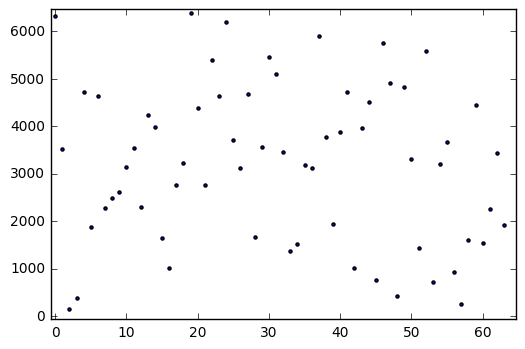

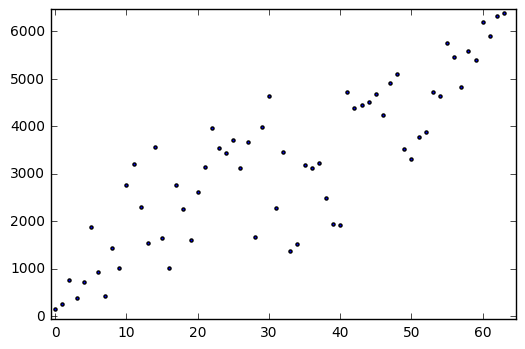

All 1 lists of size list_size = 64 have been successfully biheapified.

Biheapifying 128 elements.
Input data:


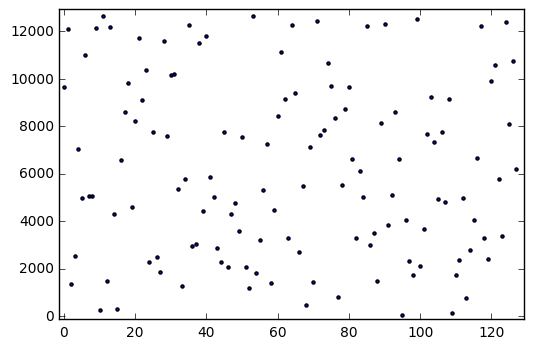

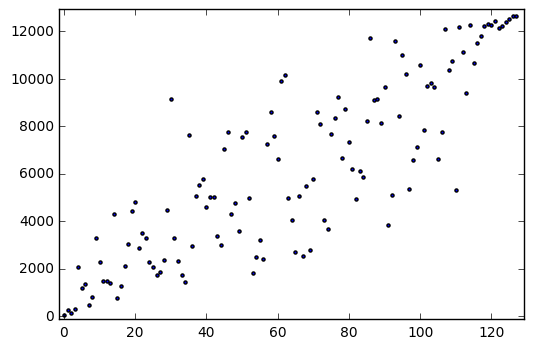

All 1 lists of size list_size = 128 have been successfully biheapified.

Biheapifying 192 elements.
Input data:


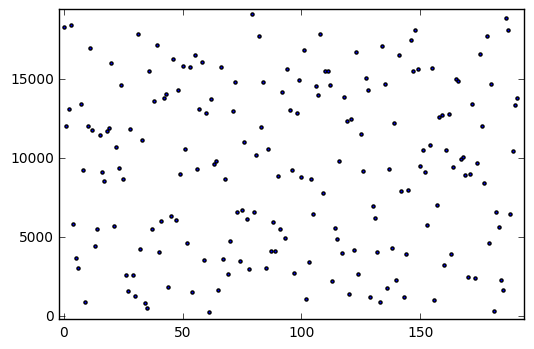

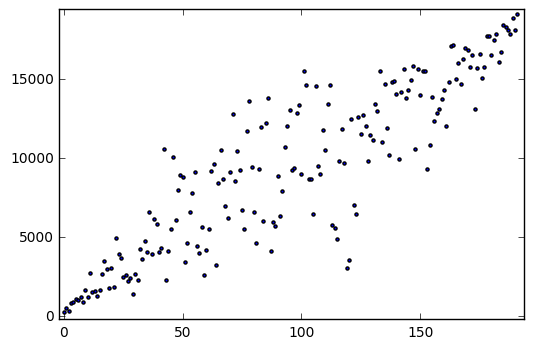

All 1 lists of size list_size = 192 have been successfully biheapified.

Biheapifying 256 elements.
Input data:


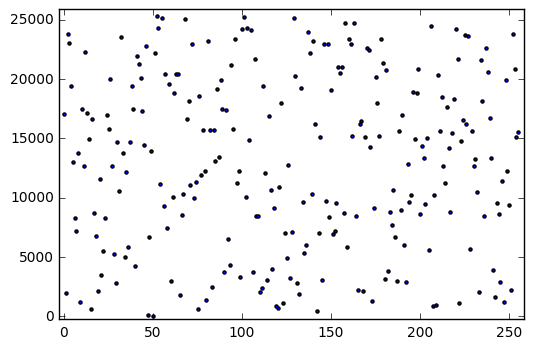

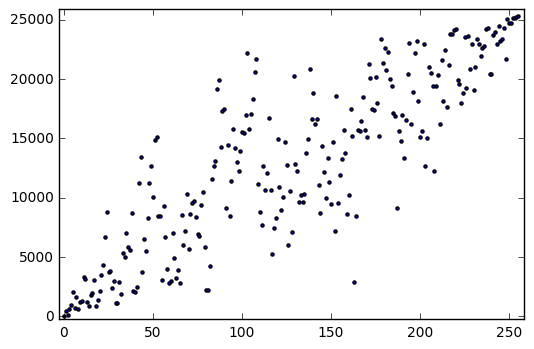

All 1 lists of size list_size = 256 have been successfully biheapified.

Biheapifying 320 elements.
Input data:


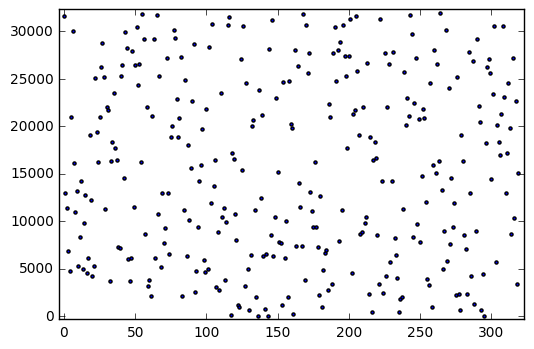

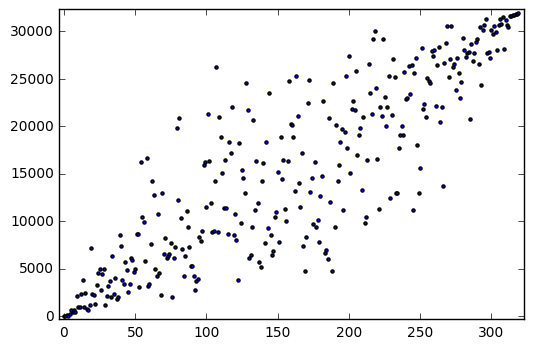

All 1 lists of size list_size = 320 have been successfully biheapified.

Biheapifying 384 elements.
Input data:


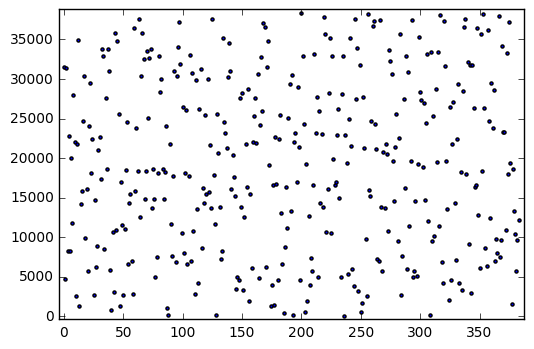

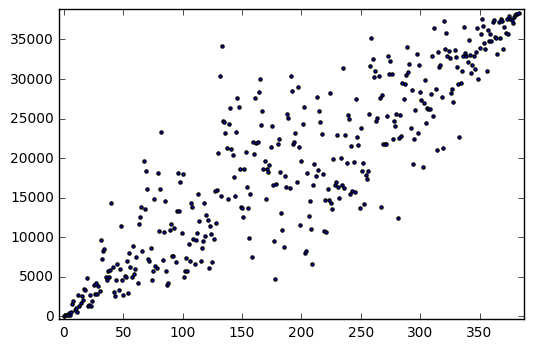

All 1 lists of size list_size = 384 have been successfully biheapified.

Biheapifying 448 elements.
Input data:


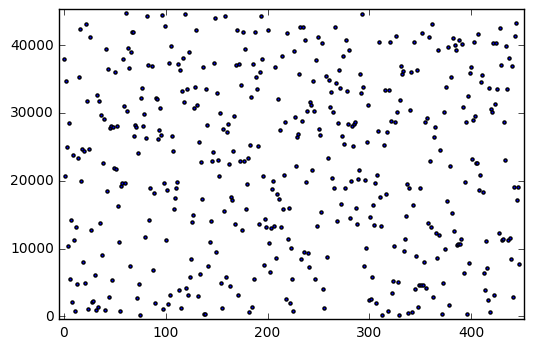

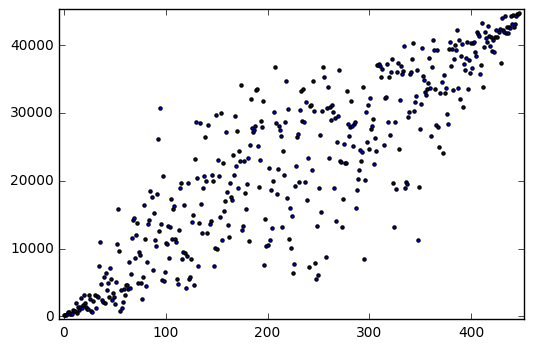

All 1 lists of size list_size = 448 have been successfully biheapified.

Biheapifying 512 elements.
Input data:


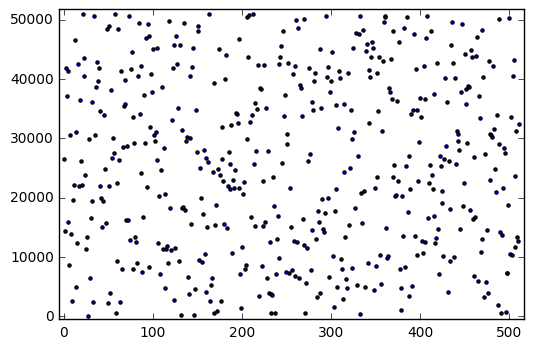

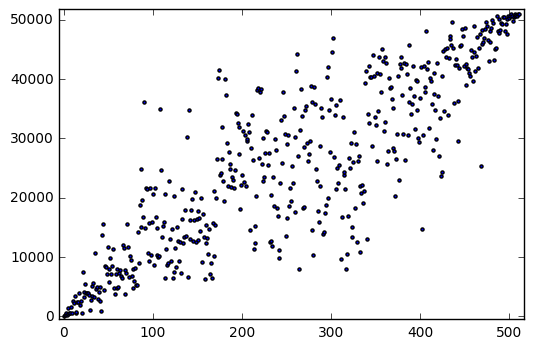

All 1 lists of size list_size = 512 have been successfully biheapified.

Biheapifying 576 elements.
Input data:


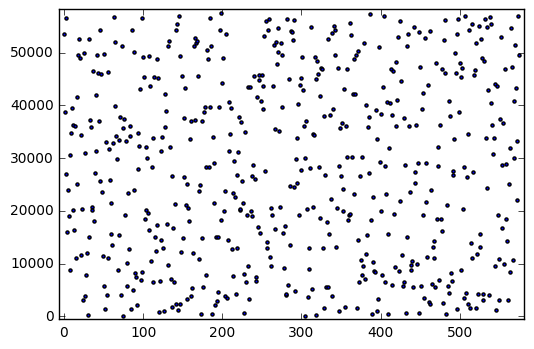

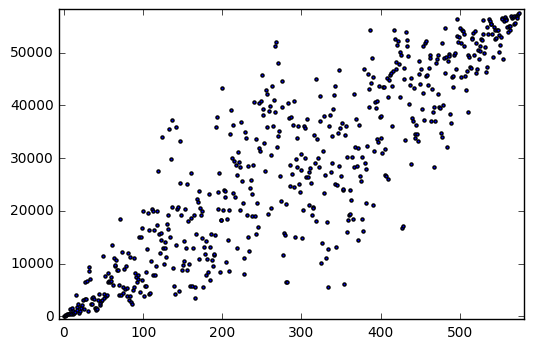

All 1 lists of size list_size = 576 have been successfully biheapified.

Biheapifying 640 elements.
Input data:


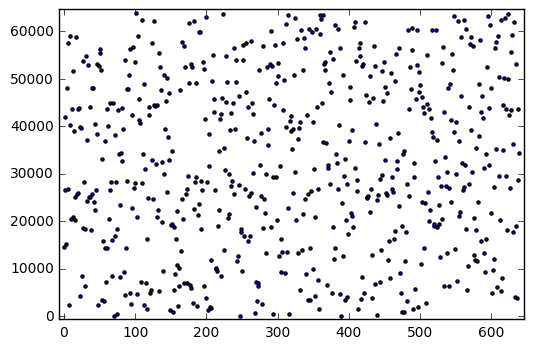

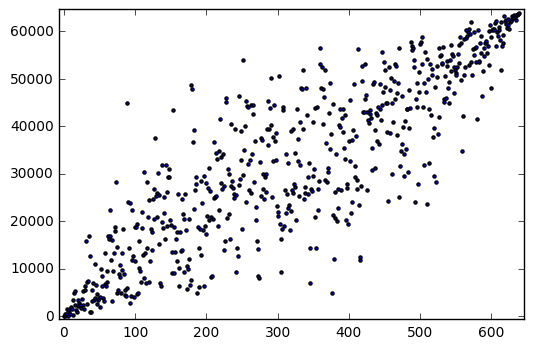

All 1 lists of size list_size = 640 have been successfully biheapified.

Biheapifying 704 elements.
Input data:


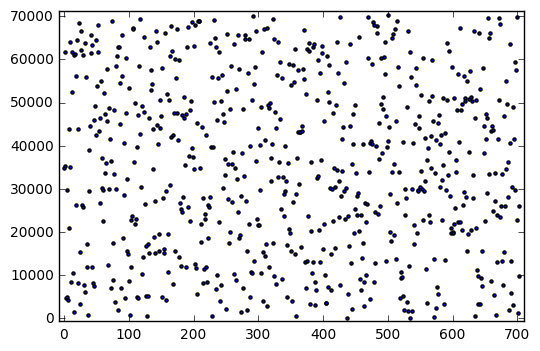

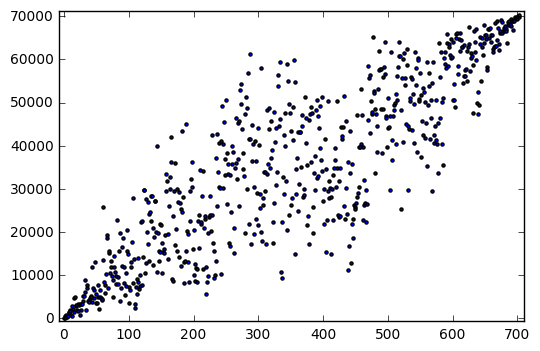

All 1 lists of size list_size = 704 have been successfully biheapified.

Biheapifying 768 elements.
Input data:


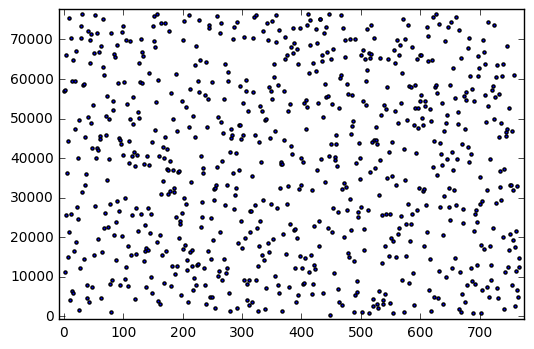

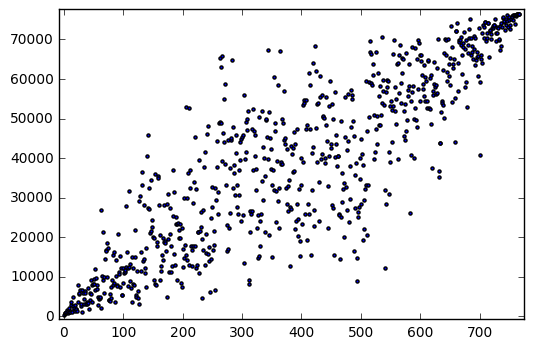

All 1 lists of size list_size = 768 have been successfully biheapified.

Biheapifying 832 elements.
Input data:


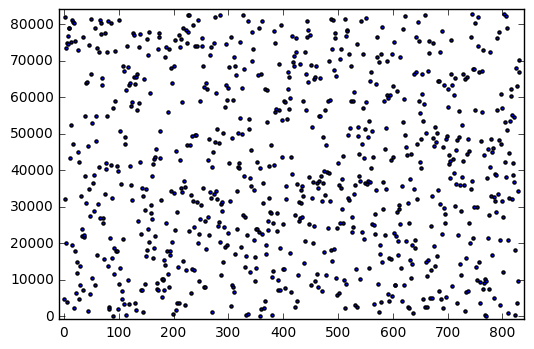

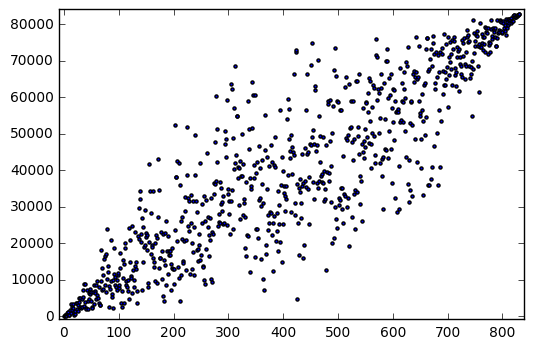

All 1 lists of size list_size = 832 have been successfully biheapified.

Biheapifying 896 elements.
Input data:


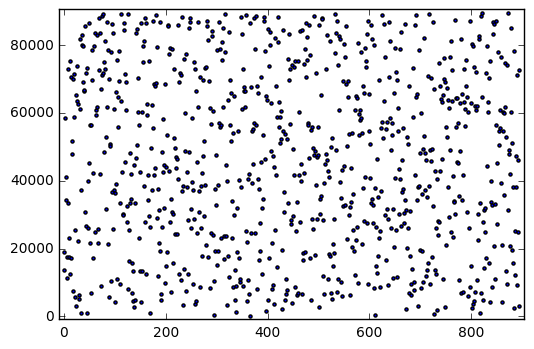

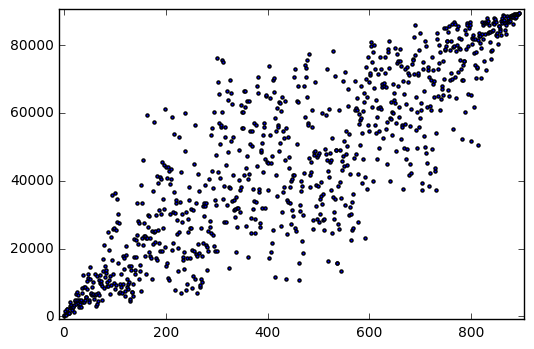

All 1 lists of size list_size = 896 have been successfully biheapified.

Biheapifying 960 elements.
Input data:


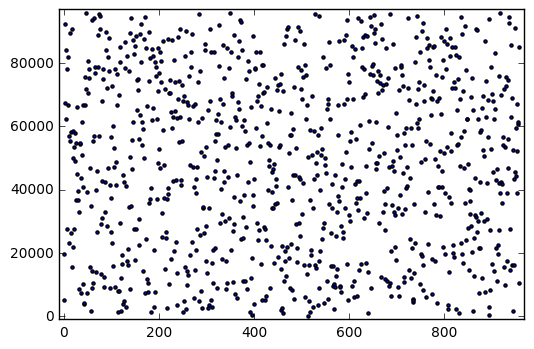

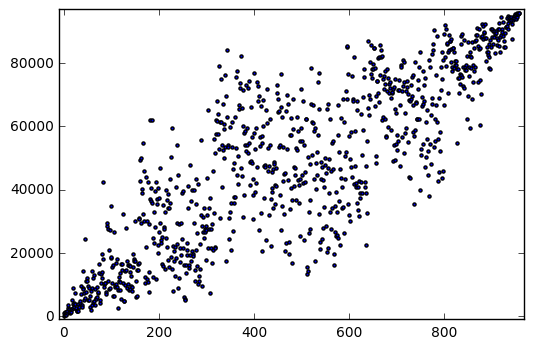

All 1 lists of size list_size = 960 have been successfully biheapified.

Biheapifying 1024 elements.
Input data:


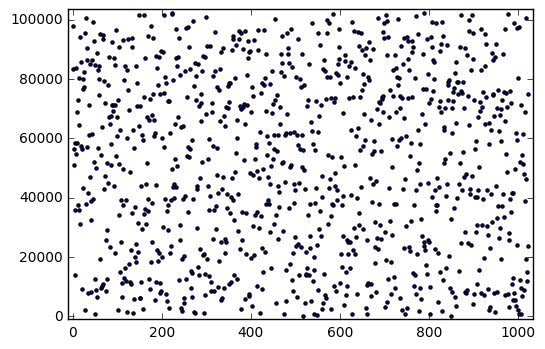

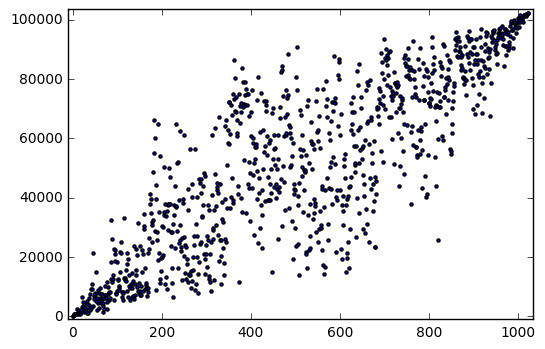

All 1 lists of size list_size = 1024 have been successfully biheapified.



In [3]:
BiHeapifyPlot()

Biheapifying 64 elements.
Input data:


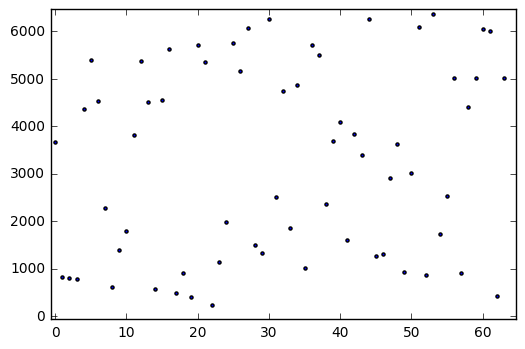

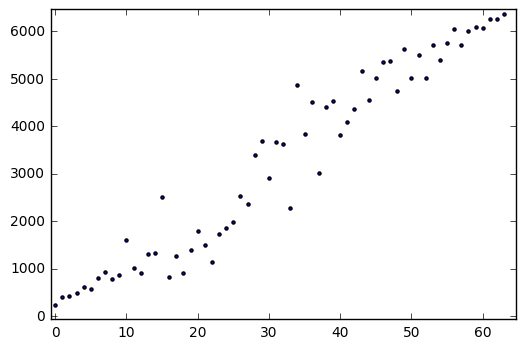

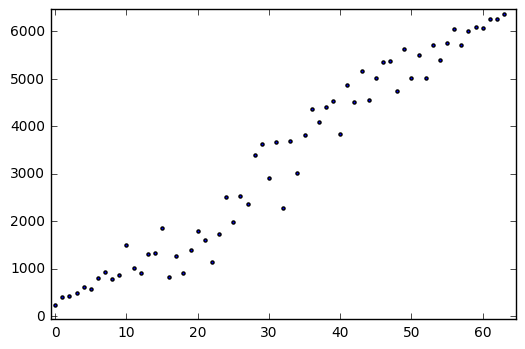

Biheapifying 128 elements.
Input data:


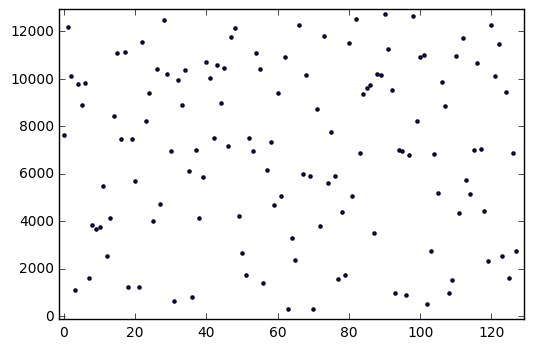

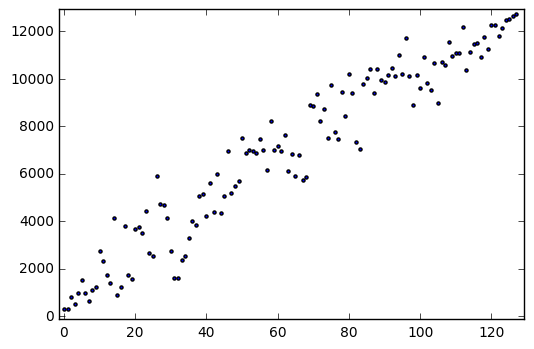

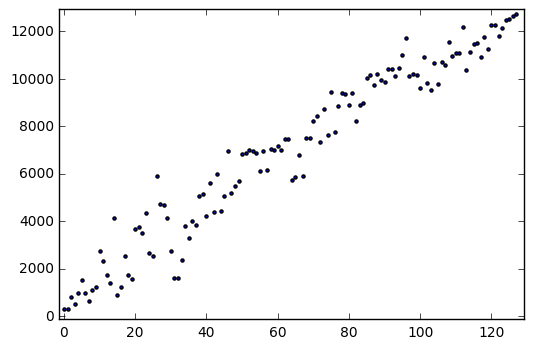

Biheapifying 192 elements.
Input data:


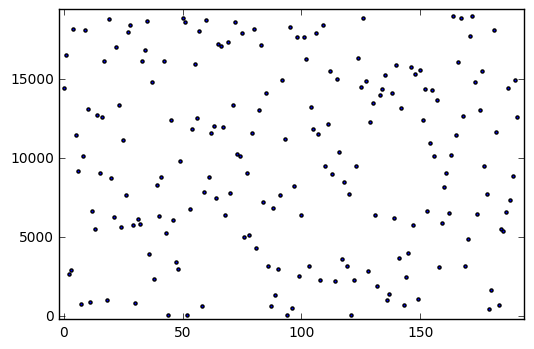

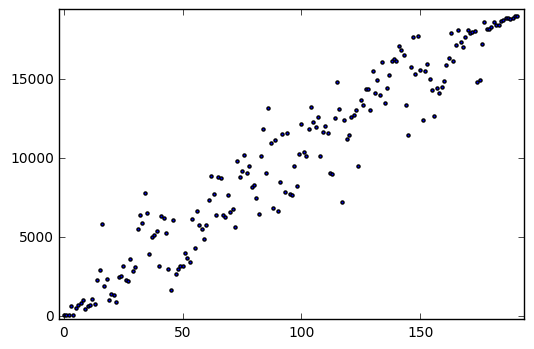

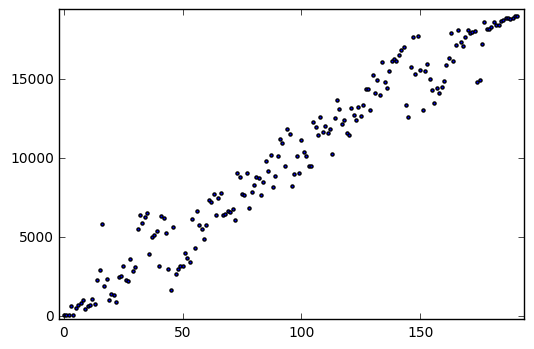

Biheapifying 256 elements.
Input data:


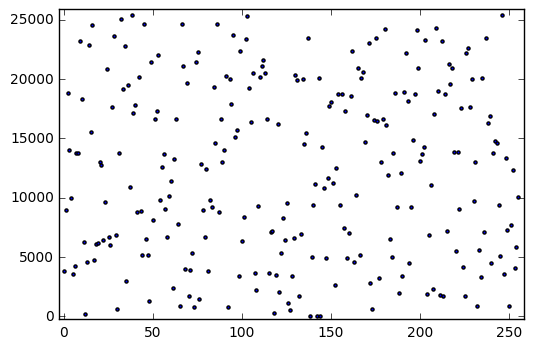

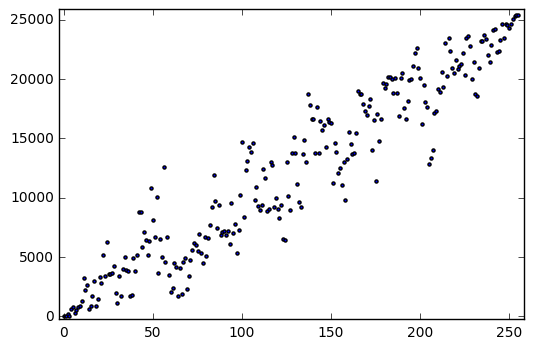

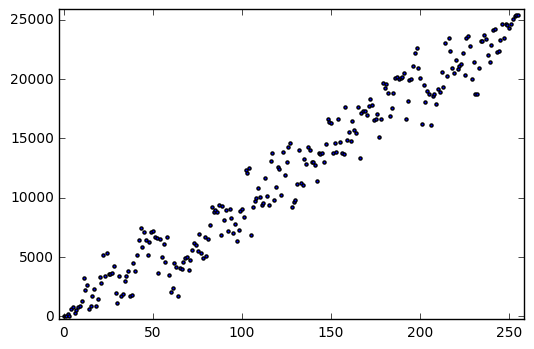

Biheapifying 320 elements.
Input data:


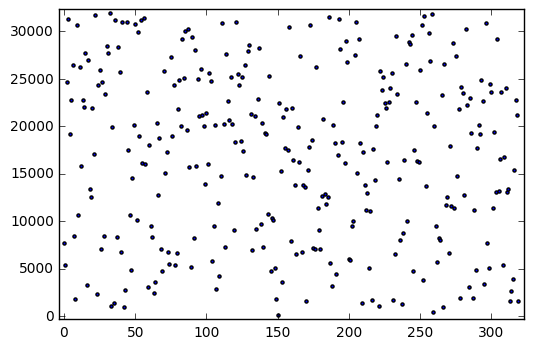

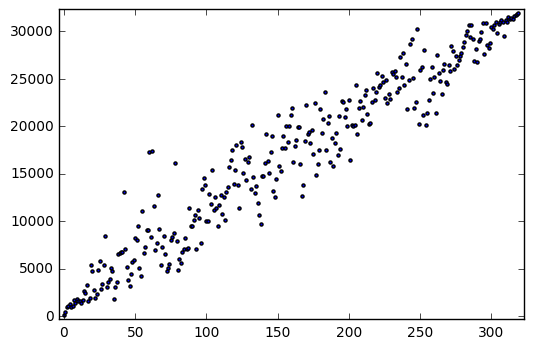

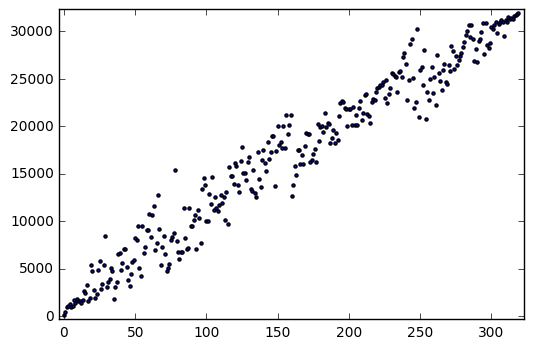

Biheapifying 384 elements.
Input data:


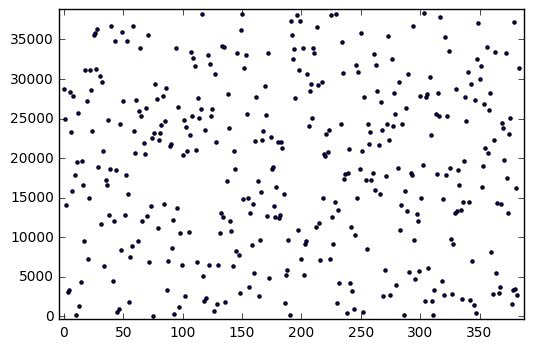

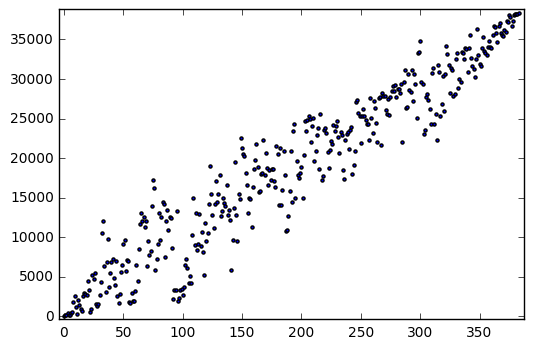

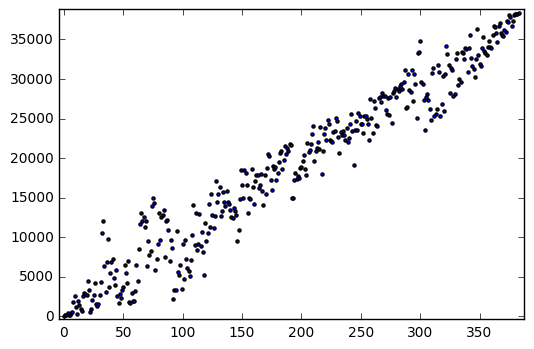

Biheapifying 448 elements.
Input data:


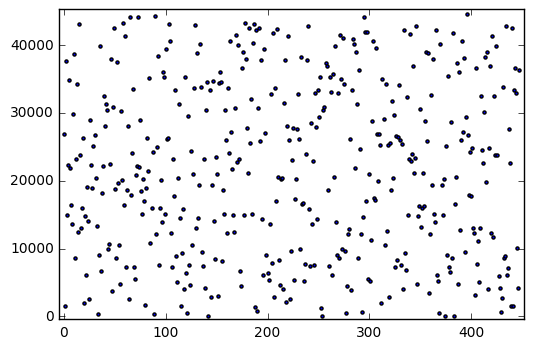

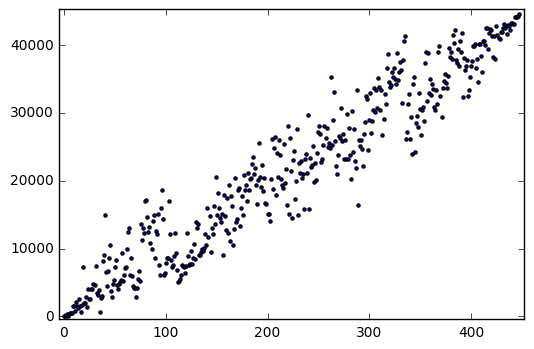

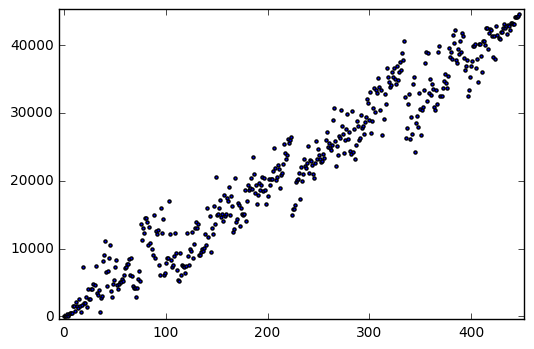

Biheapifying 512 elements.
Input data:


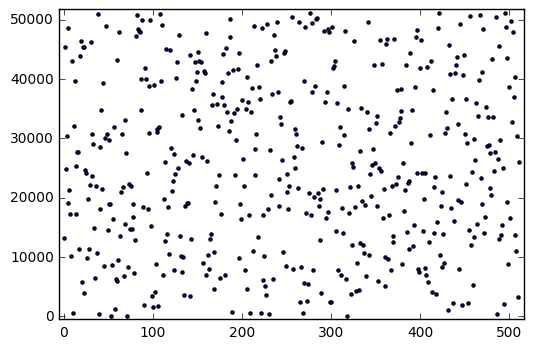

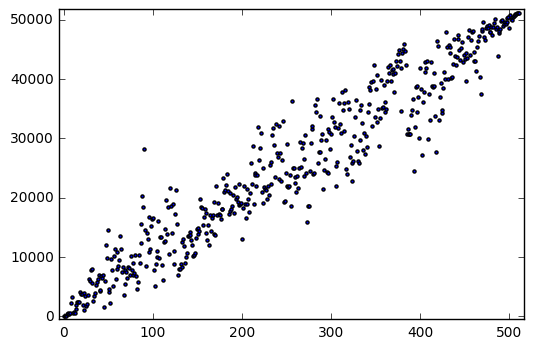

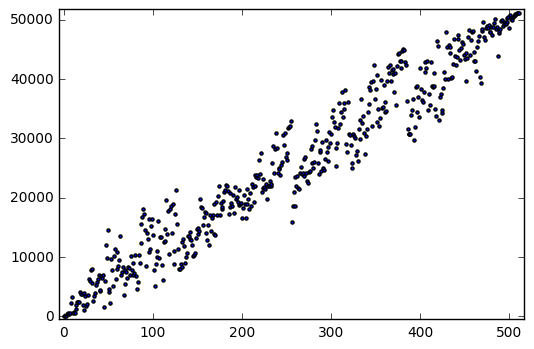

Biheapifying 576 elements.
Input data:


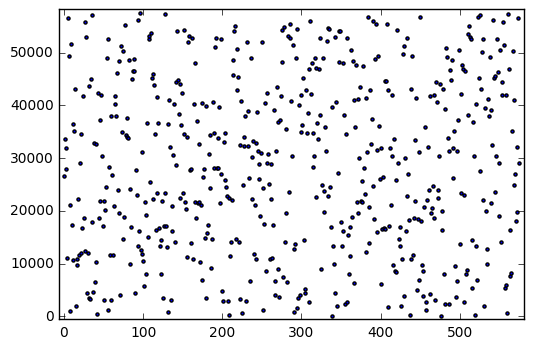

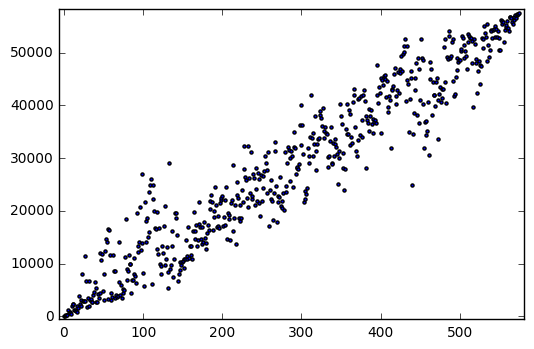

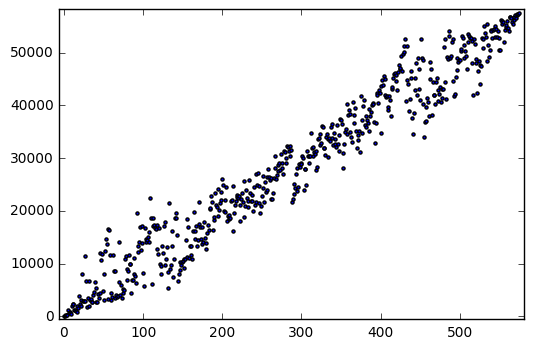

Biheapifying 640 elements.
Input data:


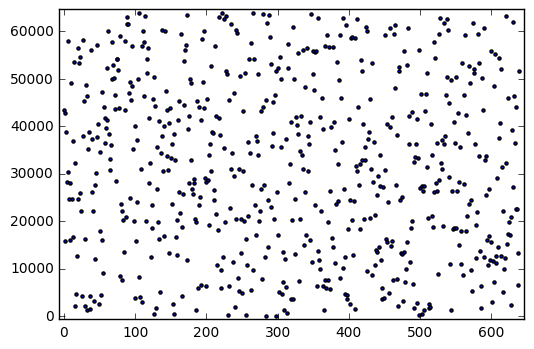

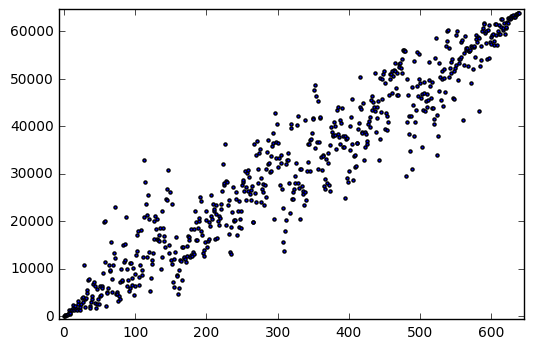

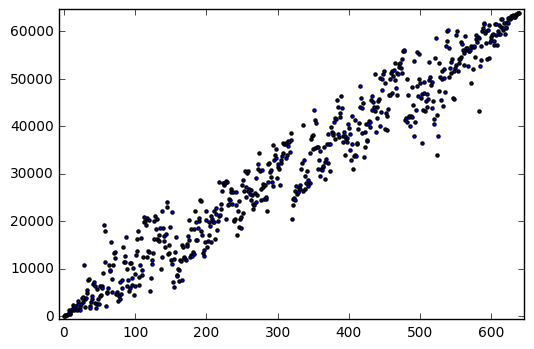

Biheapifying 704 elements.
Input data:


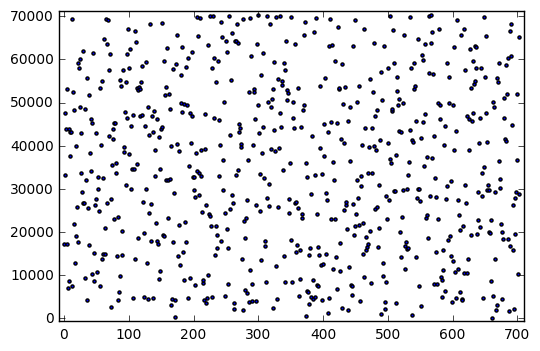

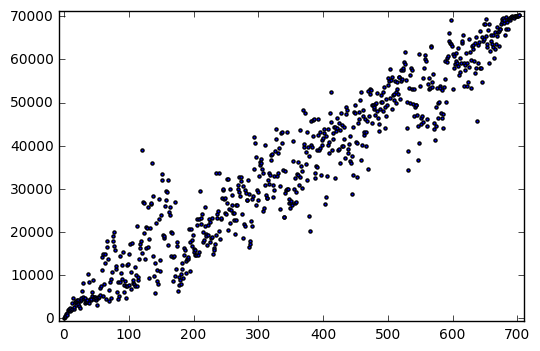

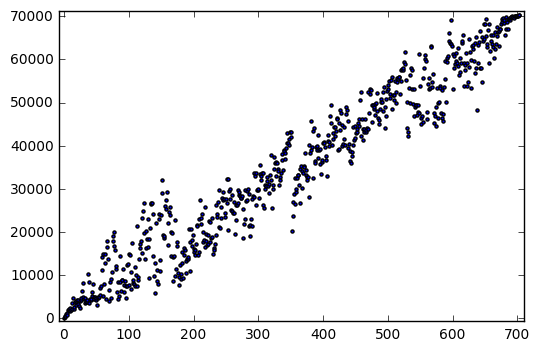

Biheapifying 768 elements.
Input data:


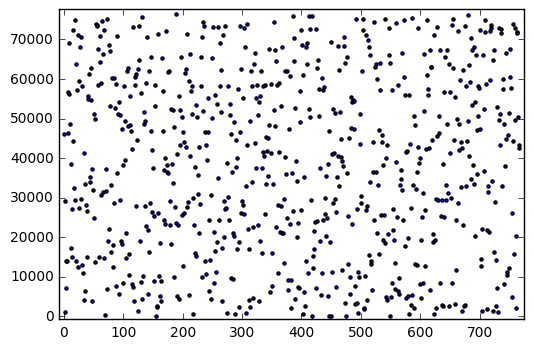

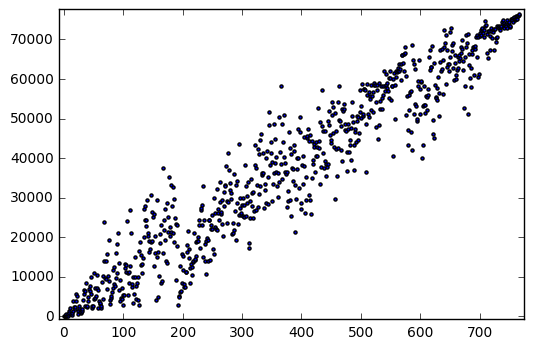

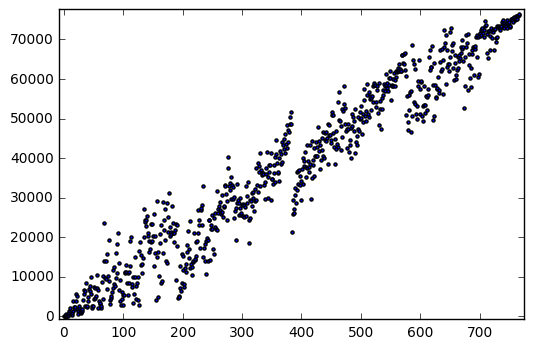

Biheapifying 832 elements.
Input data:


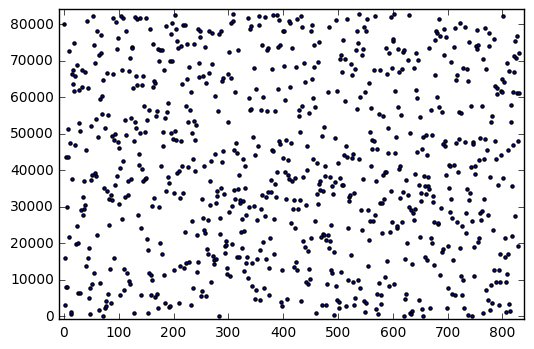

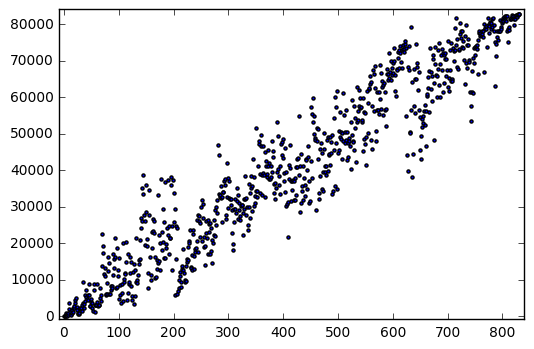

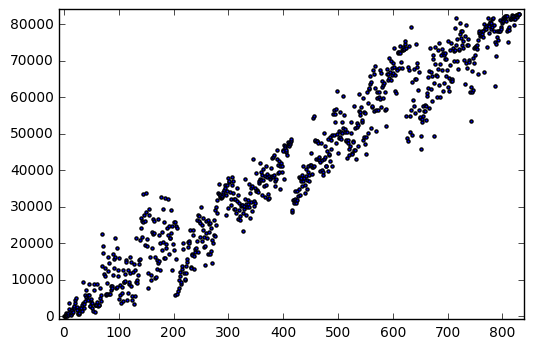

Biheapifying 896 elements.
Input data:


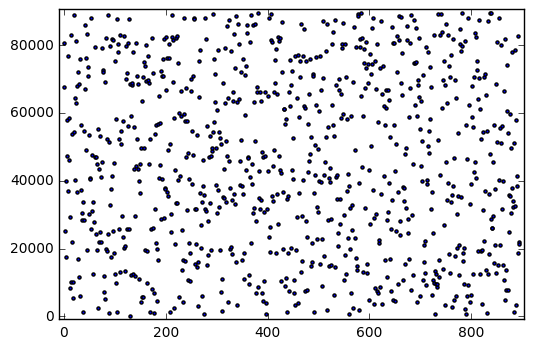

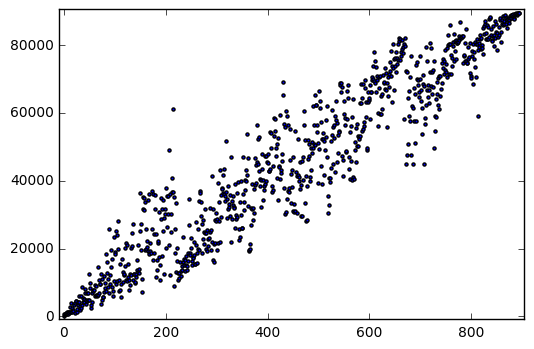

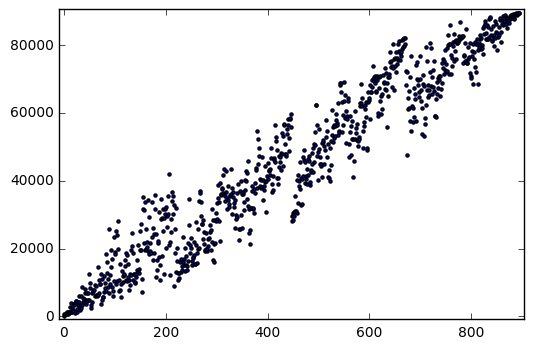

Biheapifying 960 elements.
Input data:


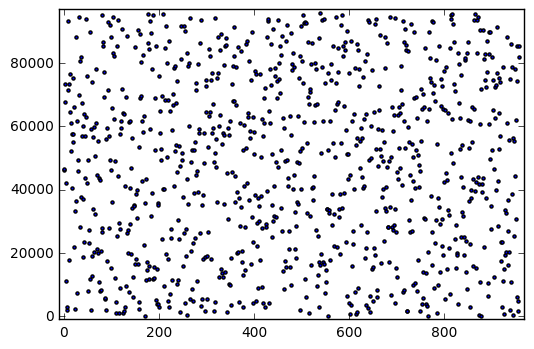

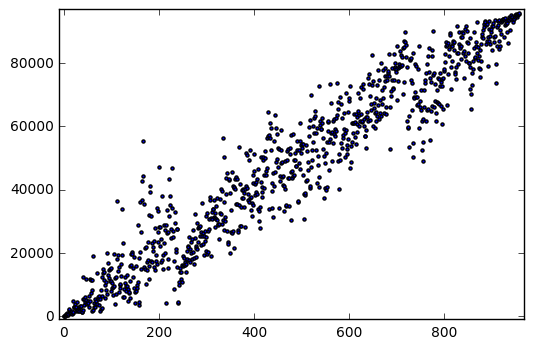

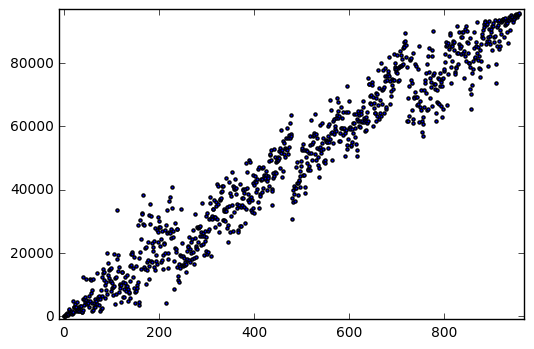

Biheapifying 1024 elements.
Input data:


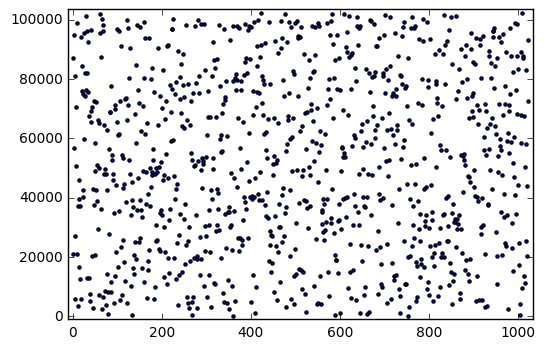

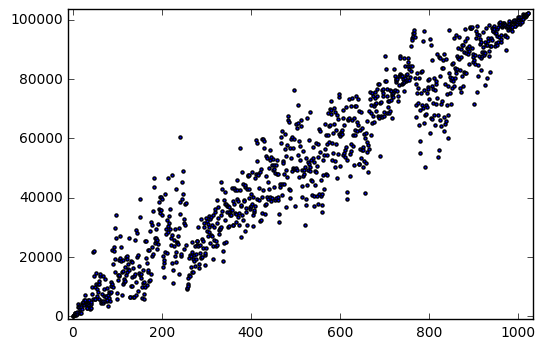

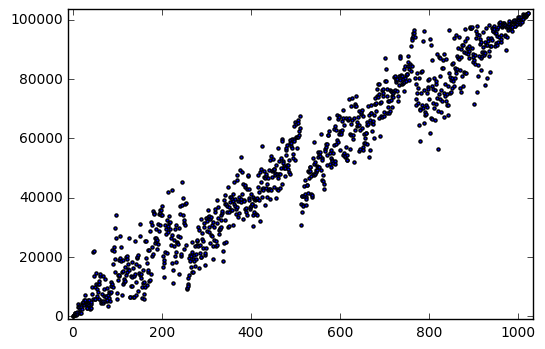

In [4]:
def BiHeapifySub(li, start_index, total_num_nodes):
    sublist = li[start_index:start_index + total_num_nodes]
    BiHeapify(sublist, total_num_nodes)
    li[start_index:start_index + total_num_nodes] = sublist
    return

def BiHeapifyPlot2():
    list_size_start = 2**6
    list_size_end = 2**10
    list_size_increment = 2**6
    list_size = list_size_start
    num_random_lists_per_vec_size = 1
    while list_size <= list_size_end:
        ints_list = [x for x in range(list_size)]
        print('Biheapifying', list_size, 'elements.')
        for _ in range(num_random_lists_per_vec_size):
            print("Input data:")
            max = list_size * 100
            li = [max * random.random() for _ in range(list_size)]
            plt.scatter(ints_list, li, marker = '.')
            plt.axis([-0.01 * list_size, list_size * (1.01), -0.01 * max, 1.01 * max])
            plt.show() #show() the original data
            BiHeapify(li, list_size)
            
            three_forth_size = list_size - list_size // 4
            BiHeapifySub(li, 1, three_forth_size - 1)
            
            start = list_size // 4
            BiHeapifySub(li, start, three_forth_size - 1)
            
            plt.scatter(ints_list, li, marker = '.')
            plt.axis([-0.01 * list_size, list_size * (1.01), -0.01 * max, 1.01 * max])
            plt.show() #show() the data after three calls to BiHeapify().
            
            BiHeapifySub(li, start, list_size // 2)
            BiHeapifySub(li, 1, list_size // 2)
            BiHeapifySub(li, list_size // 2, list_size // 2)
            BiHeapifySub(li, 1, list_size - 2)
            
            plt.scatter(ints_list, li, marker = '.')
            plt.axis([-0.01 * list_size, list_size * (1.01), -0.01 * max, 1.01 * max])
            plt.show() #show() the data after these calls to BiHeapify().
                       #Note how the above O(n) operations resulted in the data
                       # being ordered in a way that is "approximately sorted".
        if list_size >= list_size_end:
            break
        list_size = list_size + list_size_increment
    return

BiHeapifyPlot2()

In [5]:
def BiHeapifyRec(li, start_index, total_num_nodes):
    if total_num_nodes <= 1:
        return
    BiHeapifySub(li, start_index, total_num_nodes)
    new_total_num_nodes = total_num_nodes // 2
    new_start_index = start_index + (new_total_num_nodes // 2)
    BiHeapifyRec(li, new_start_index, new_total_num_nodes)
    BiHeapifySub(li, start_index, total_num_nodes)
    return

Recursively Biheapifying 64 elements.
Input data:


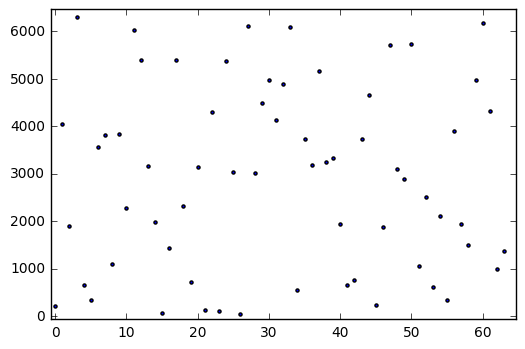

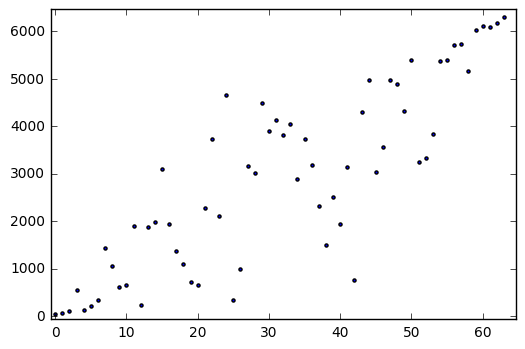

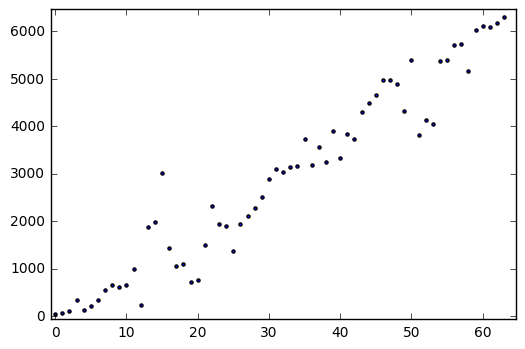

Recursively Biheapifying 128 elements.
Input data:


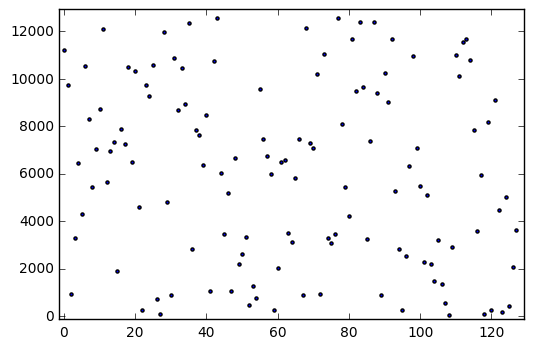

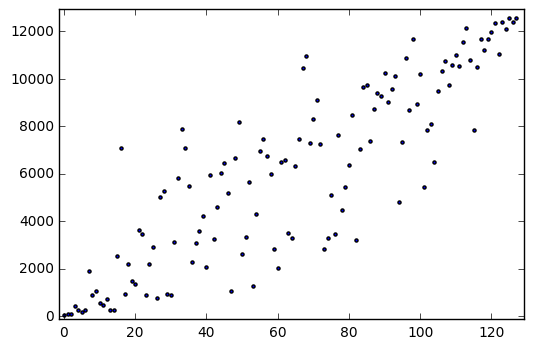

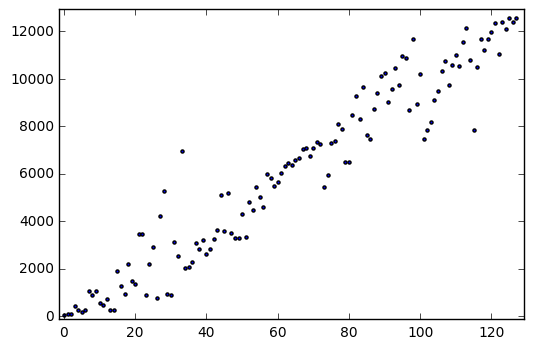

Recursively Biheapifying 192 elements.
Input data:


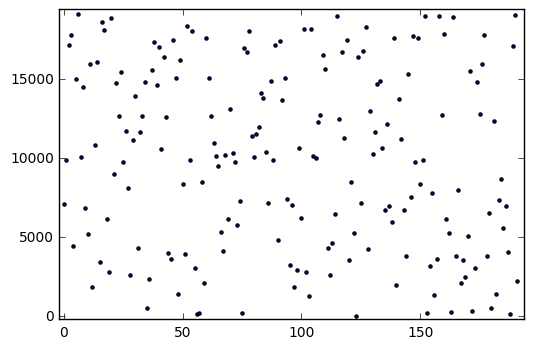

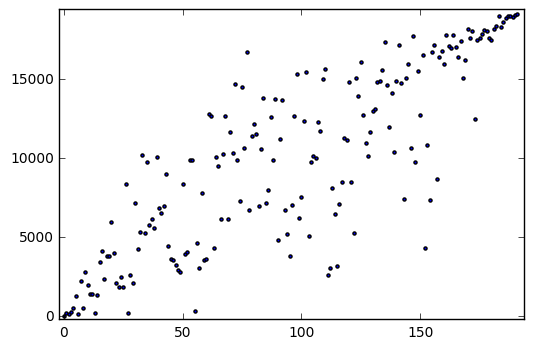

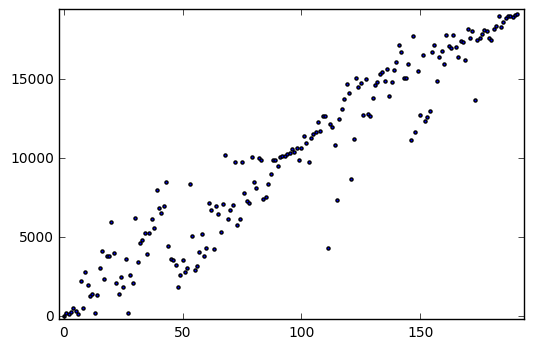

Recursively Biheapifying 256 elements.
Input data:


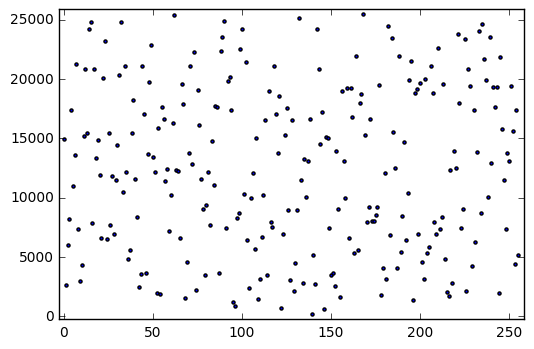

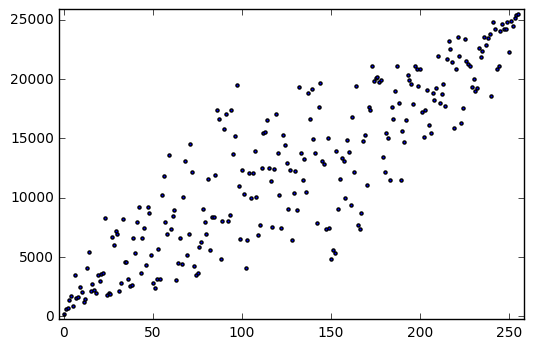

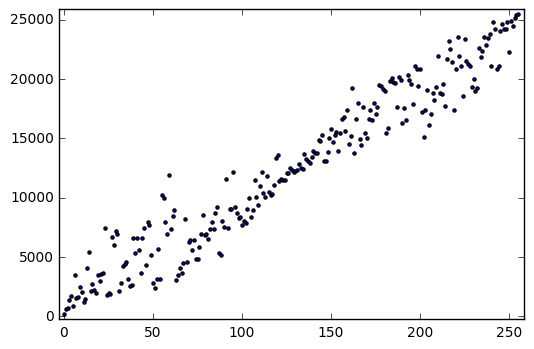

Recursively Biheapifying 320 elements.
Input data:


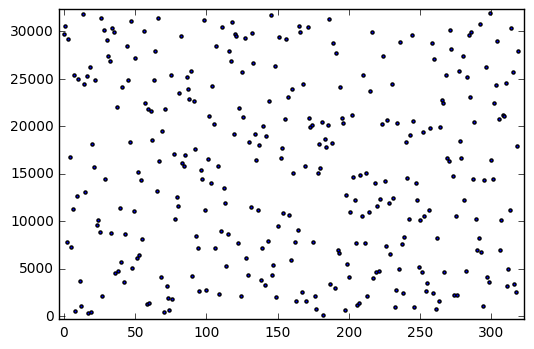

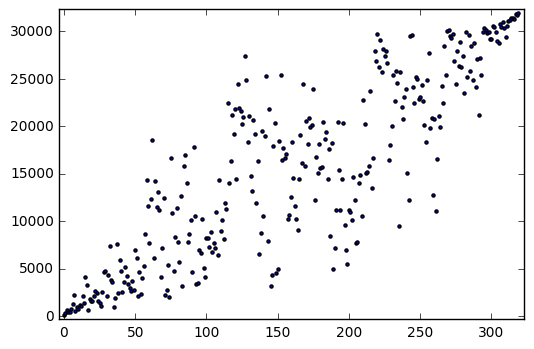

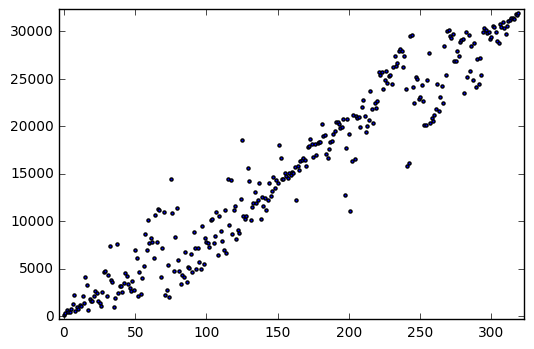

Recursively Biheapifying 384 elements.
Input data:


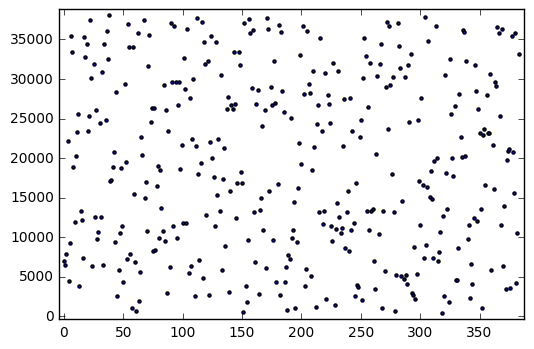

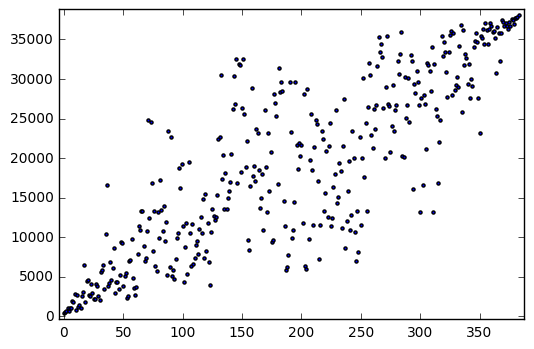

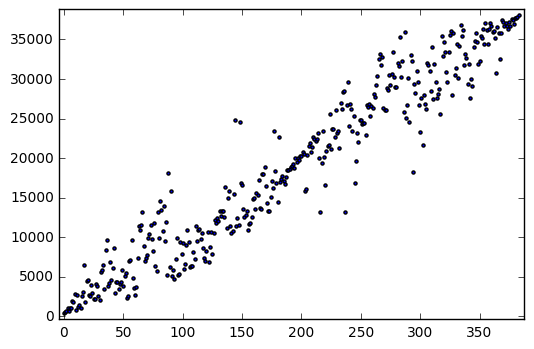

Recursively Biheapifying 448 elements.
Input data:


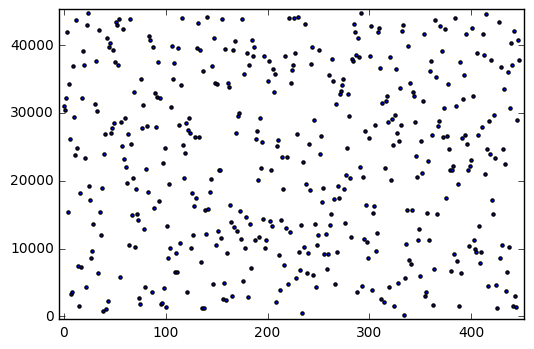

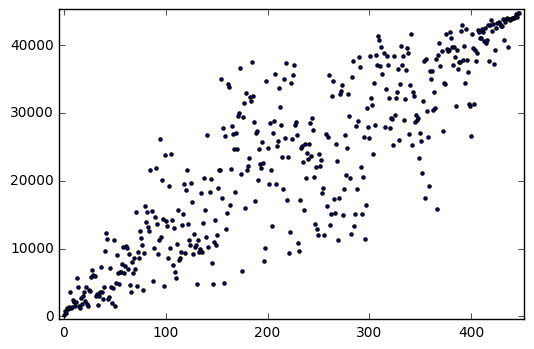

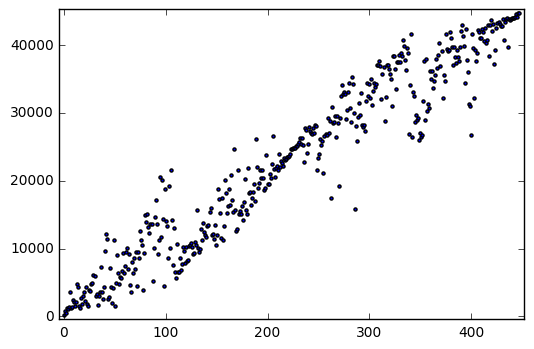

Recursively Biheapifying 512 elements.
Input data:


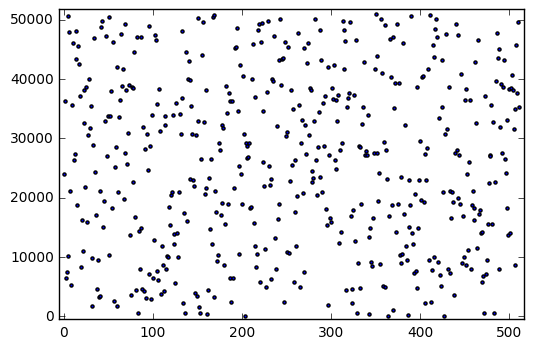

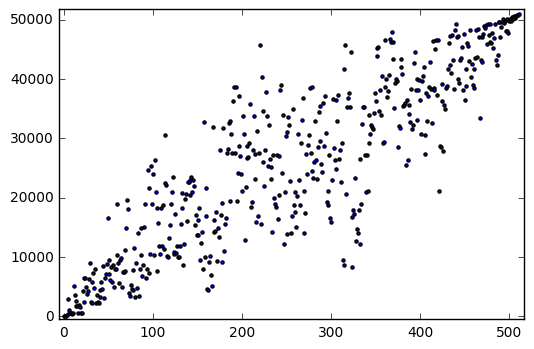

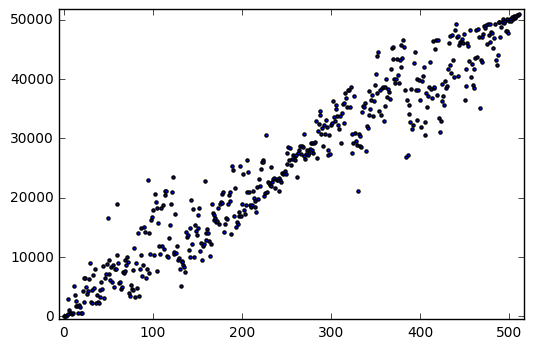

Recursively Biheapifying 576 elements.
Input data:


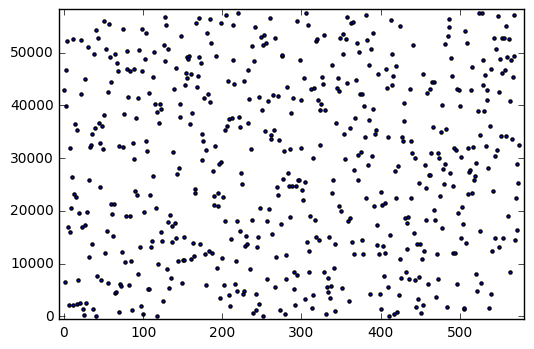

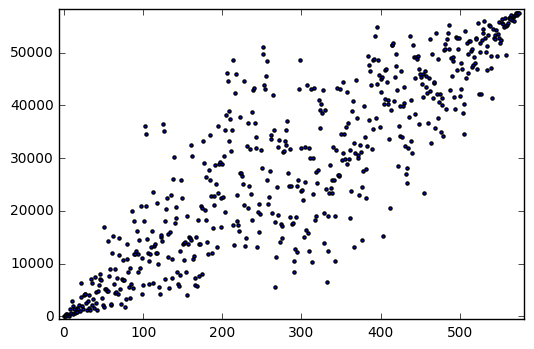

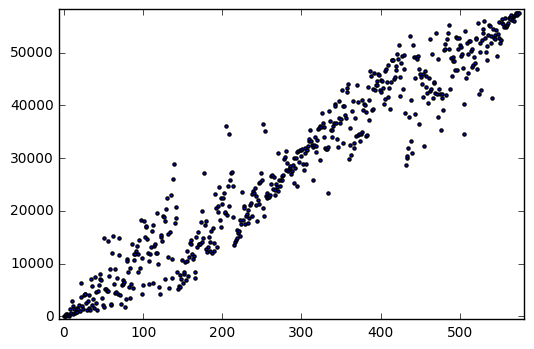

Recursively Biheapifying 640 elements.
Input data:


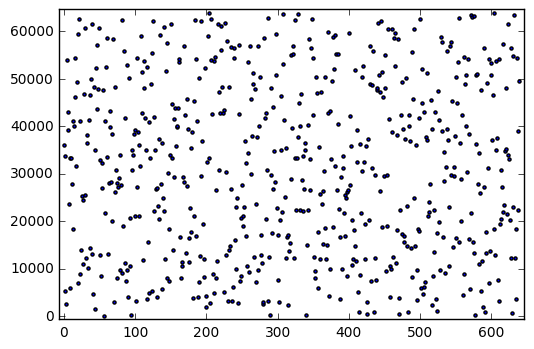

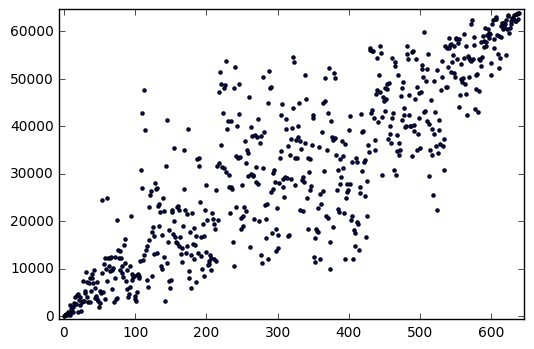

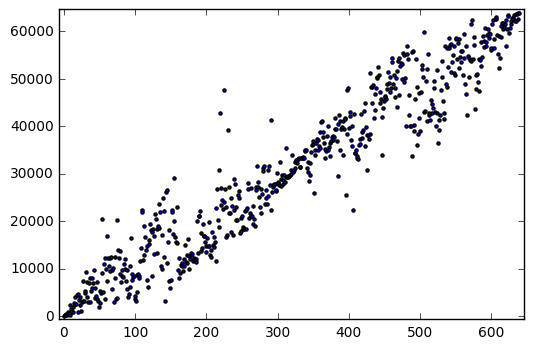

Recursively Biheapifying 704 elements.
Input data:


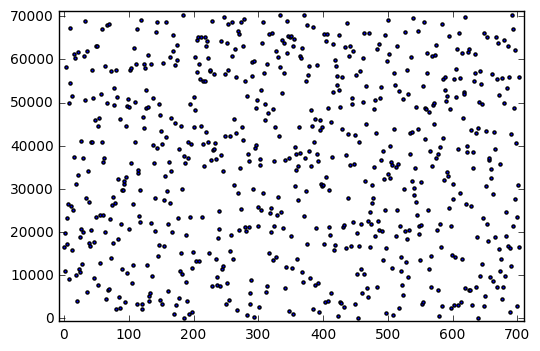

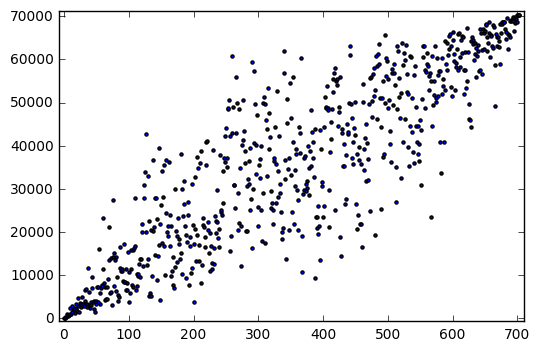

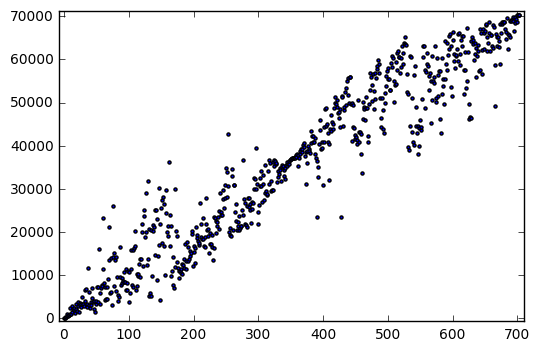

Recursively Biheapifying 768 elements.
Input data:


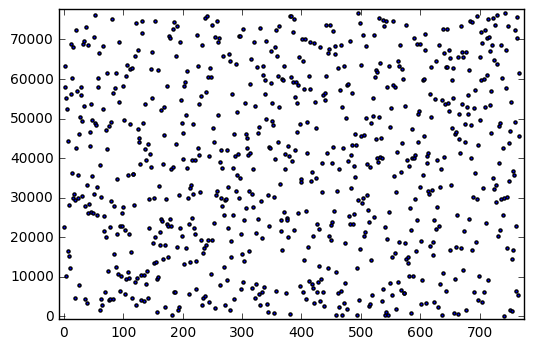

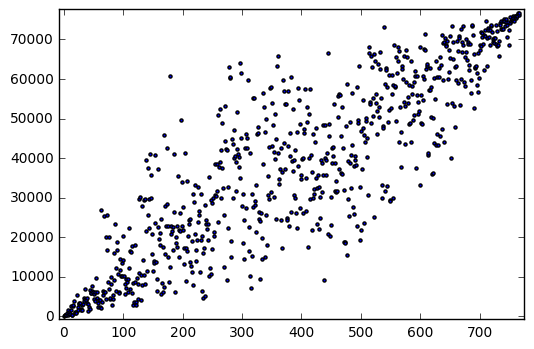

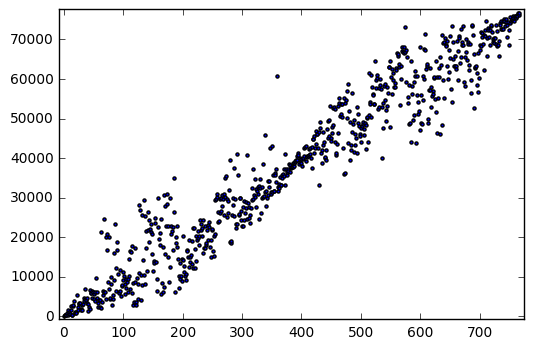

Recursively Biheapifying 832 elements.
Input data:


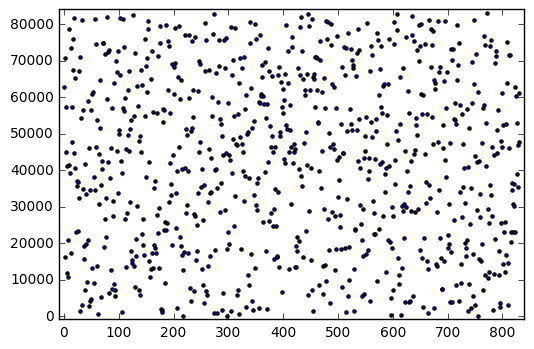

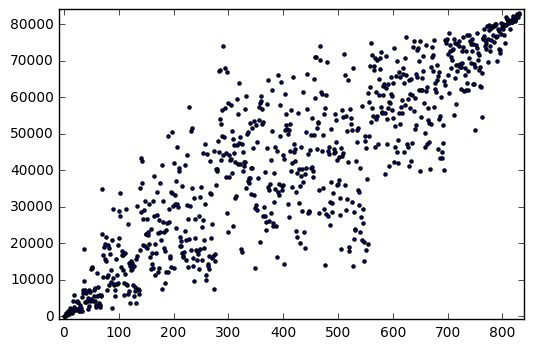

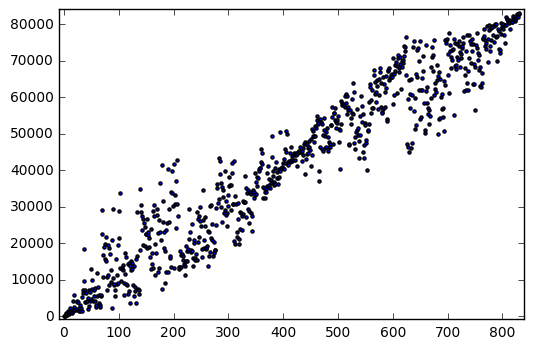

Recursively Biheapifying 896 elements.
Input data:


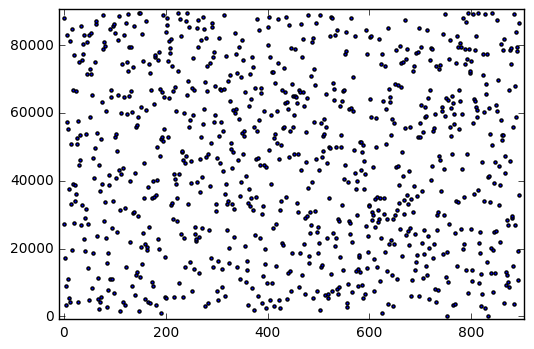

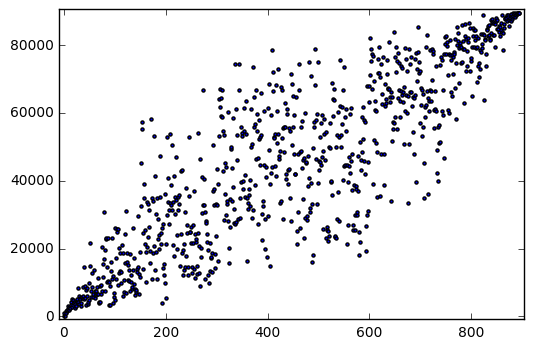

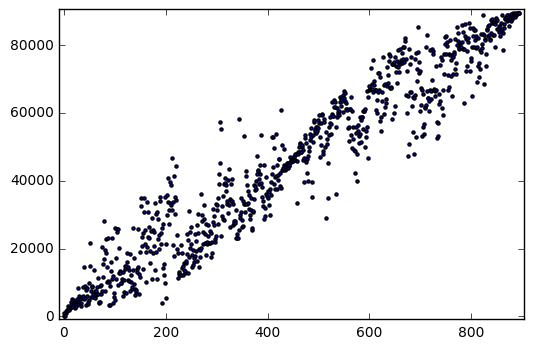

Recursively Biheapifying 960 elements.
Input data:


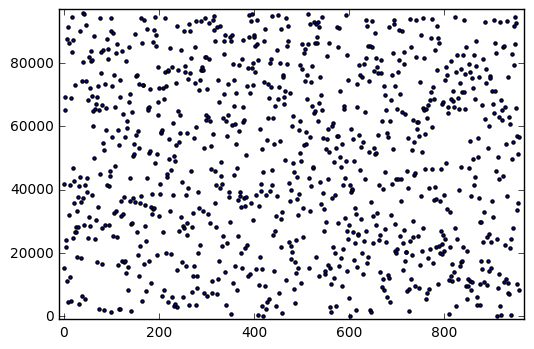

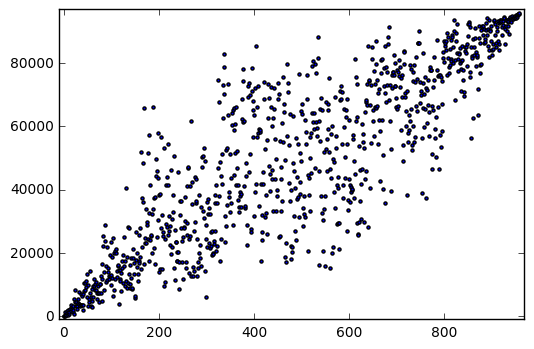

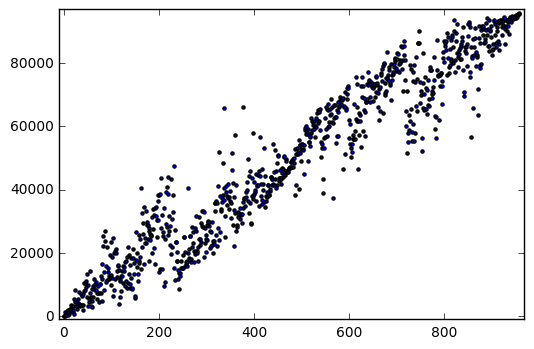

Recursively Biheapifying 1024 elements.
Input data:


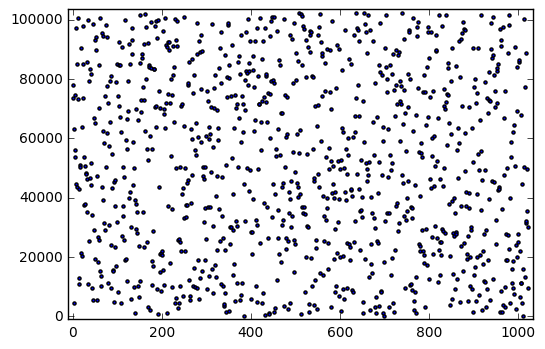

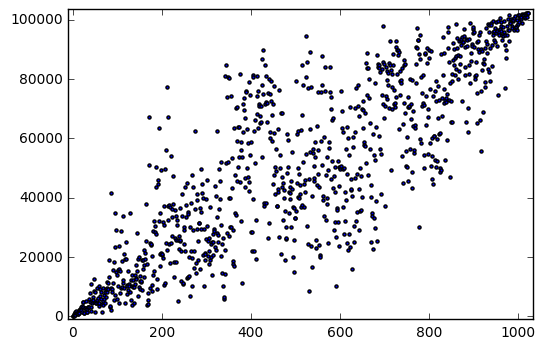

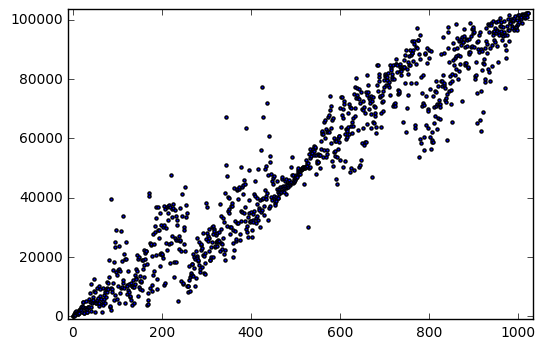

In [6]:
import random
import matplotlib.pyplot as plt
def BiHeapifyRecPlot1():
    list_size_start = 2**6
    list_size_end = 2**10
    list_size_increment = 2**6
    list_size = list_size_start
    num_random_lists_per_vec_size = 1
    while list_size <= list_size_end:
        print('Recursively Biheapifying', list_size, 'elements.')
        ints_list = [x for x in range(list_size)]
        for _ in range(num_random_lists_per_vec_size):
            print("Input data:")
            max = list_size * 100
            li = [max * random.random() for _ in range(list_size)]
            plt.scatter(ints_list, li, marker = '.')
            plt.axis([-0.01 * list_size, list_size * (1.01), -0.01 * max, 1.01 * max])
            plt.show() #show() the original data.
            BiHeapify(li, list_size)
            plt.scatter(ints_list, li, marker = '.')
            plt.axis([-0.01 * list_size, list_size * (1.01), -0.01 * max, 1.01 * max])
            plt.show() #show() the data after one call to BiHeapify().
            BiHeapifyRec(li, 0, list_size)
            plt.scatter(ints_list, li, marker = '.')
            plt.axis([-0.01 * list_size, list_size * (1.01), -0.01 * max, 1.01 * max])
            plt.show() #show() the data after one call to BiHeapifyRec().
        if list_size >= list_size_end:
            break
        list_size += list_size_increment
    return 

BiHeapifyRecPlot1()

Recursively Biheapifying 128 elements.
Input data:


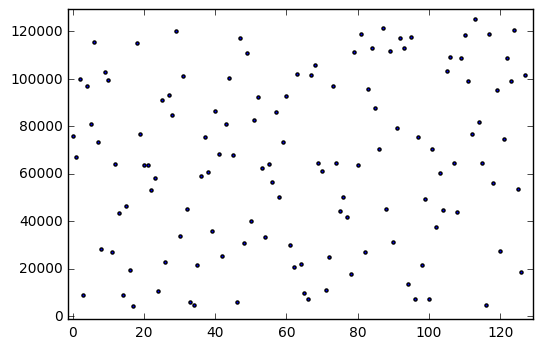

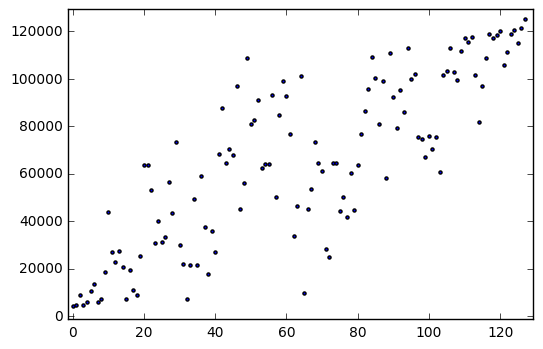

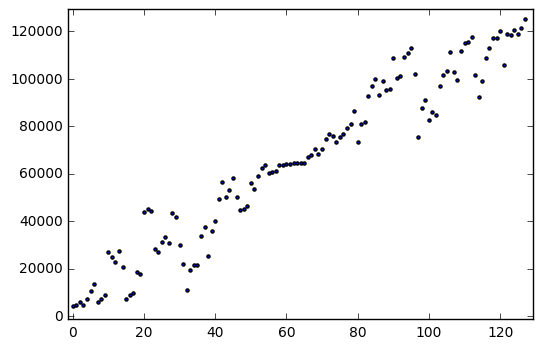

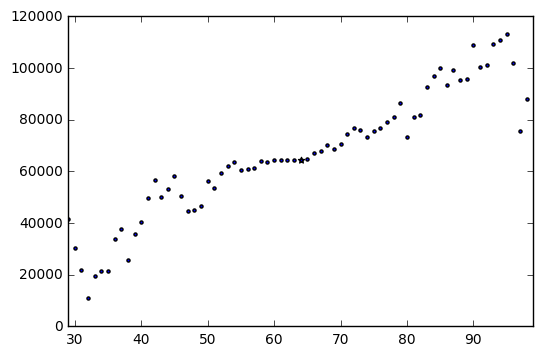

Recursively Biheapifying 192 elements.
Input data:


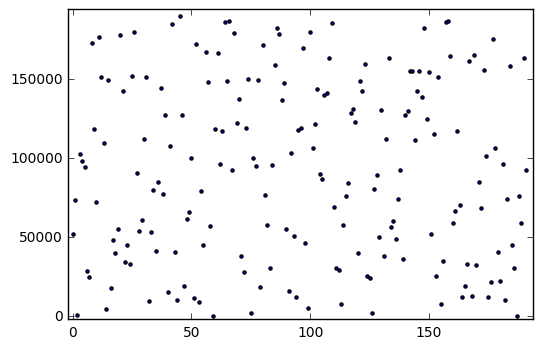

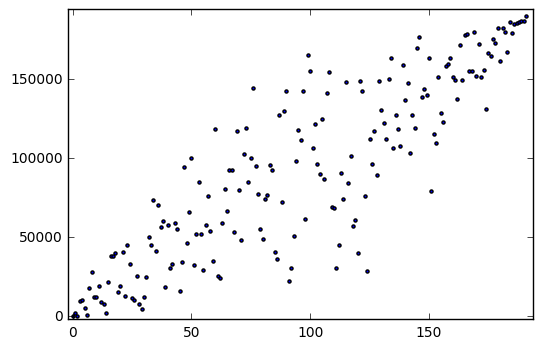

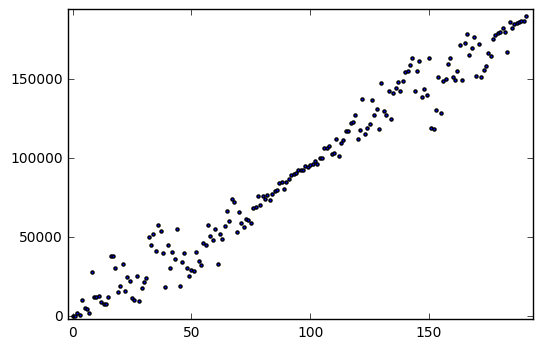

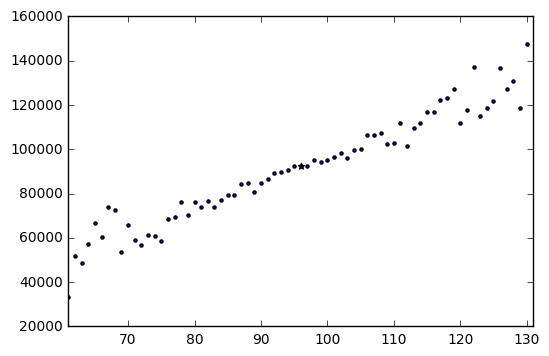

Recursively Biheapifying 256 elements.
Input data:


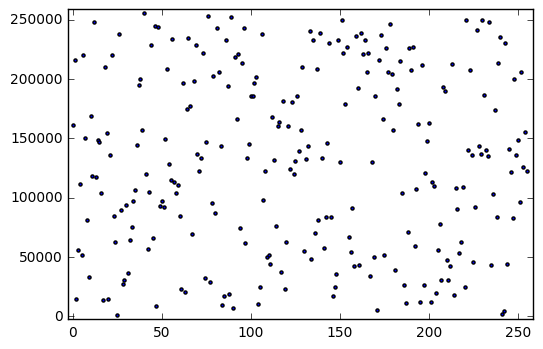

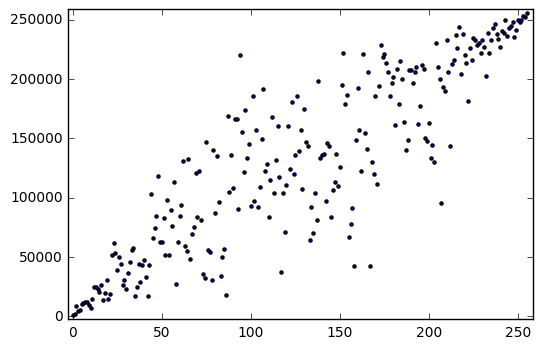

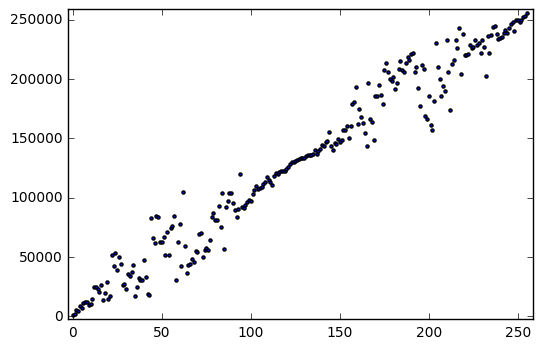

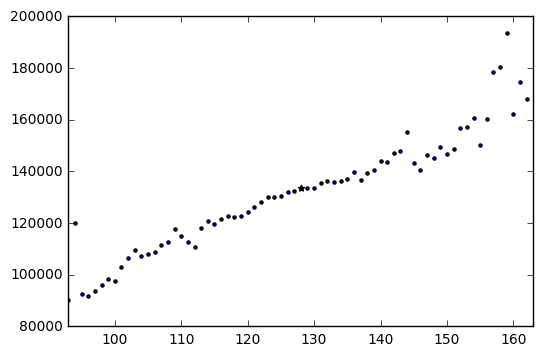

Recursively Biheapifying 320 elements.
Input data:


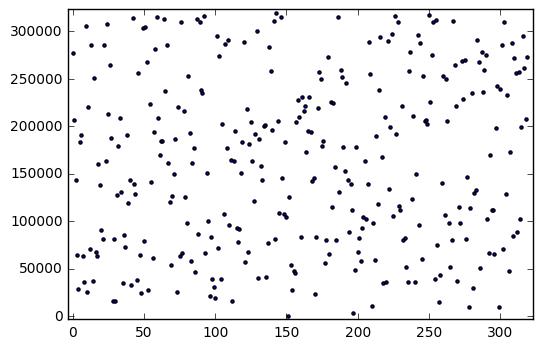

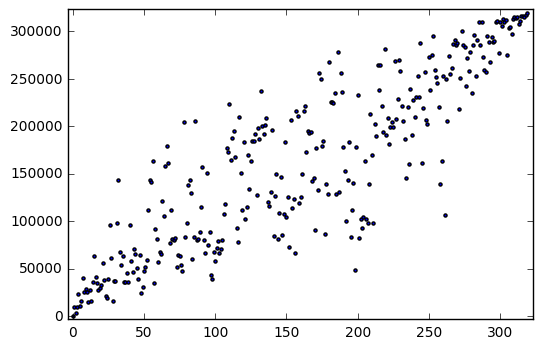

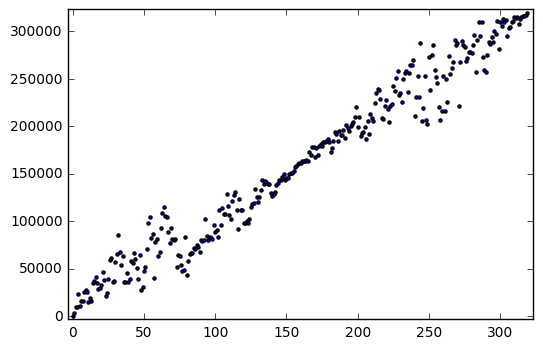

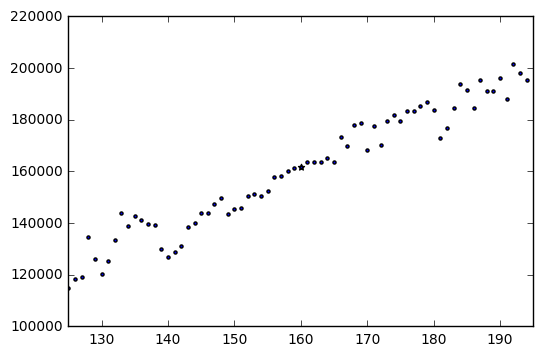

Recursively Biheapifying 384 elements.
Input data:


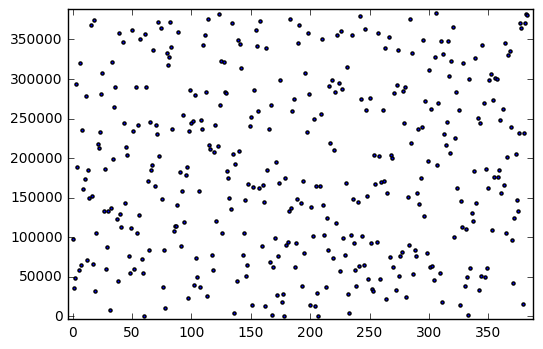

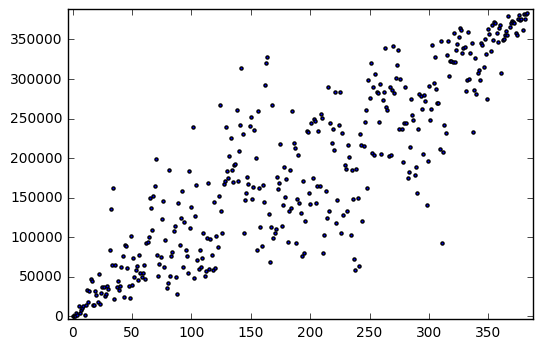

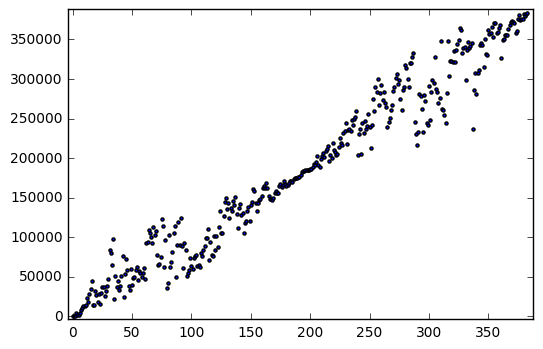

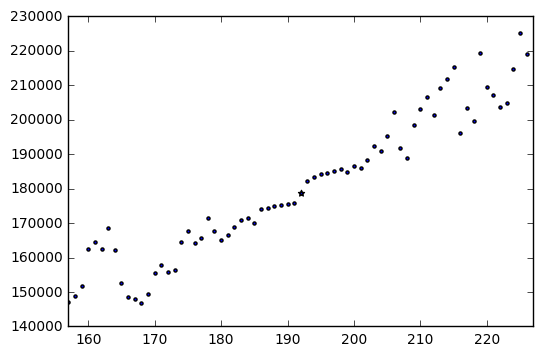

Recursively Biheapifying 448 elements.
Input data:


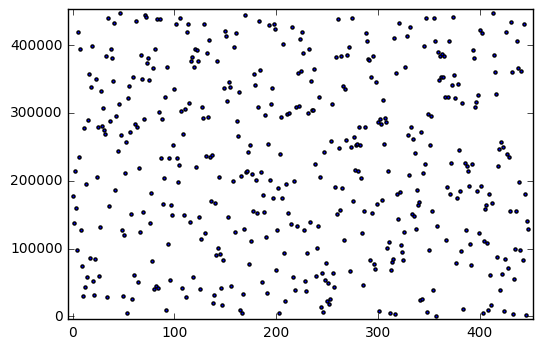

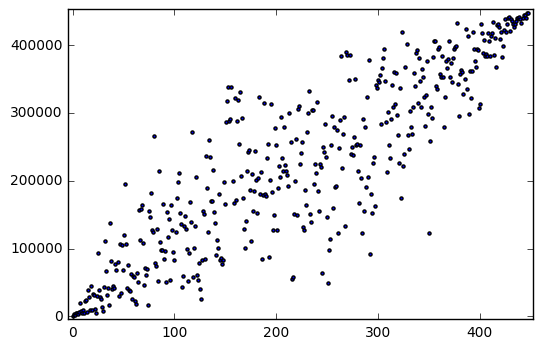

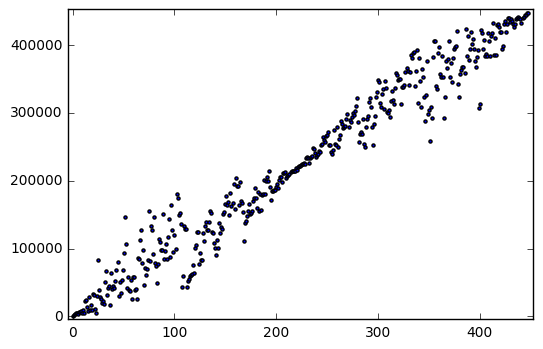

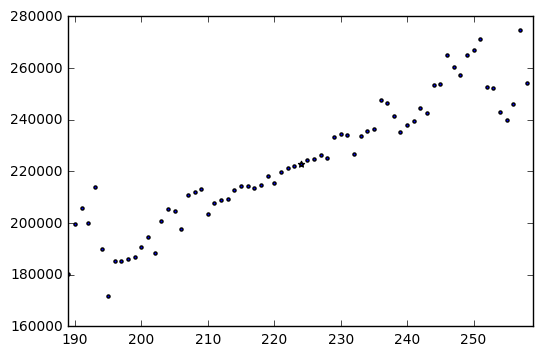

Recursively Biheapifying 512 elements.
Input data:


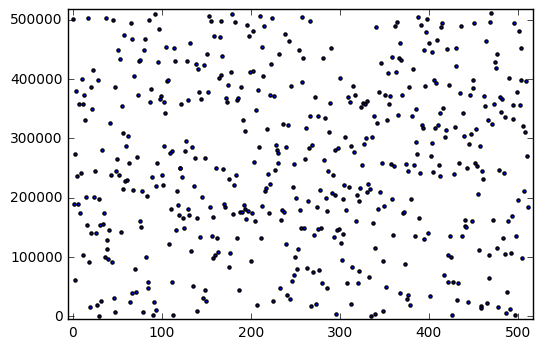

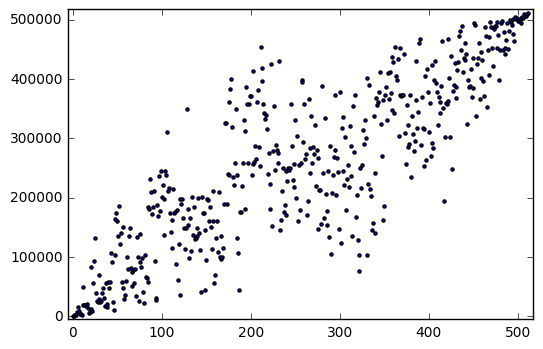

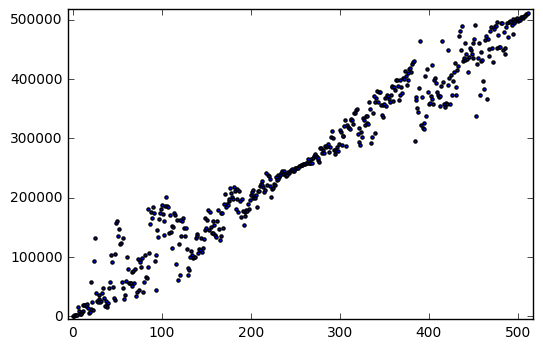

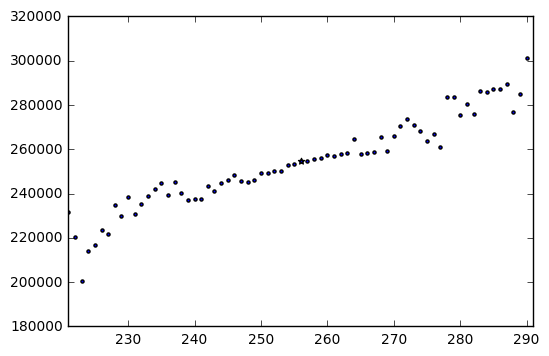

Recursively Biheapifying 576 elements.
Input data:


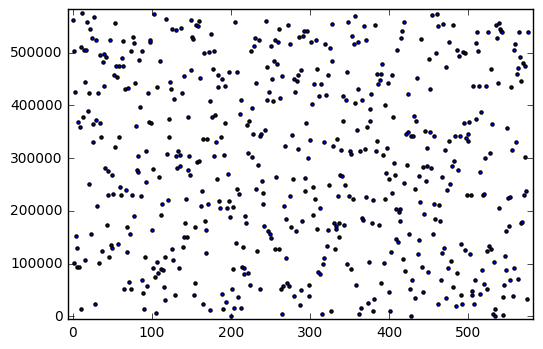

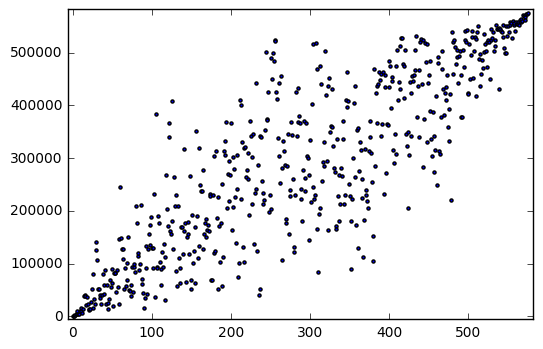

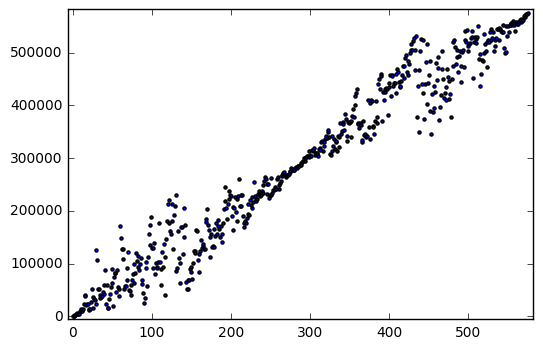

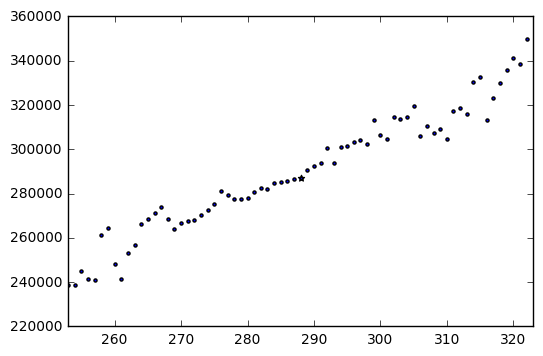

Recursively Biheapifying 640 elements.
Input data:


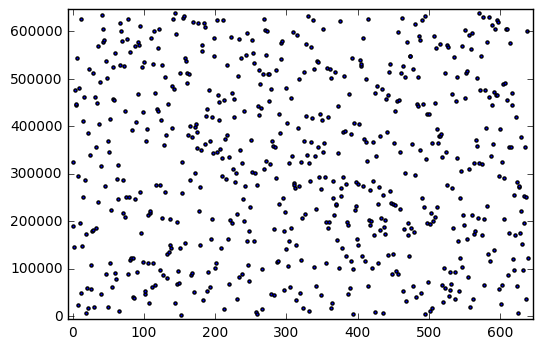

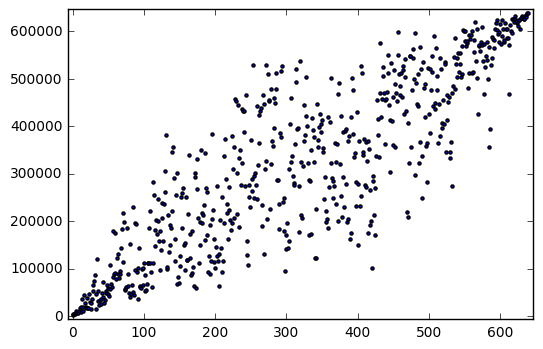

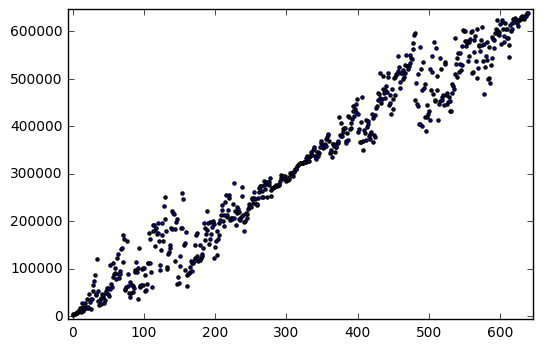

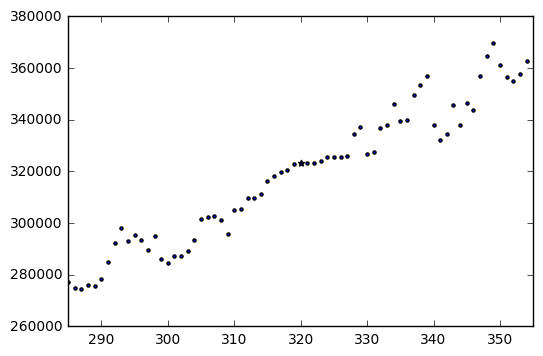

Recursively Biheapifying 704 elements.
Input data:


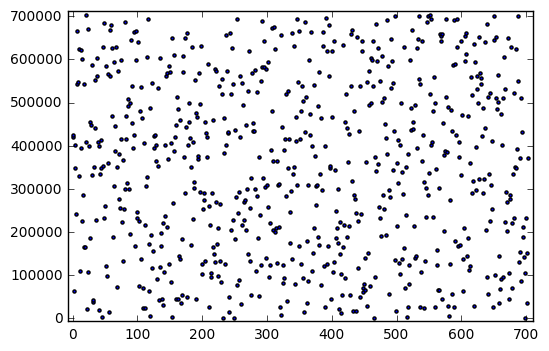

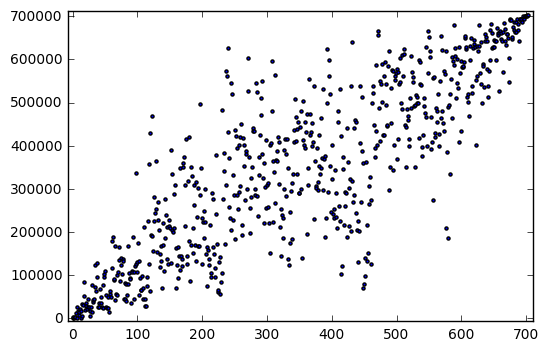

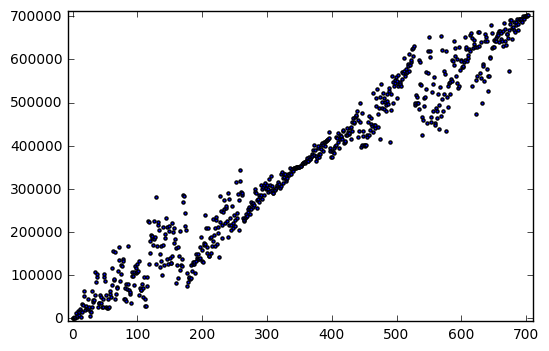

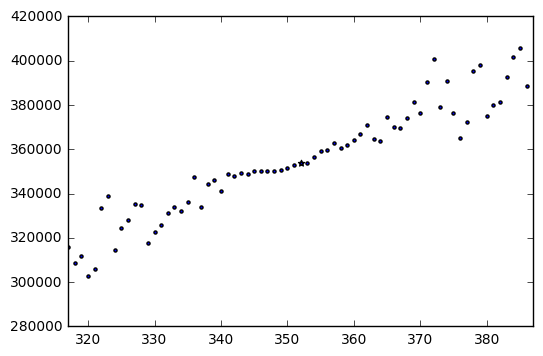

Recursively Biheapifying 768 elements.
Input data:


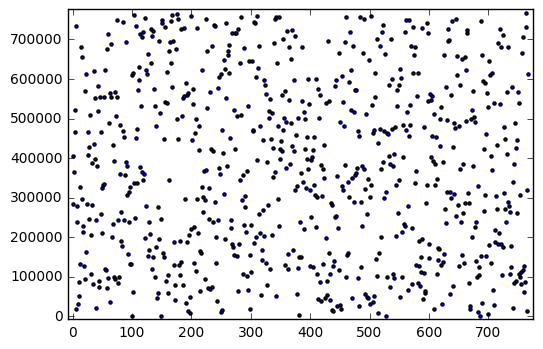

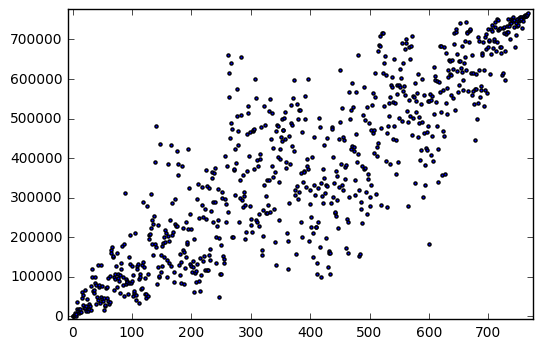

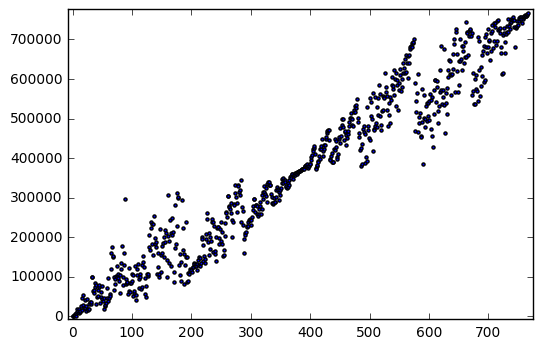

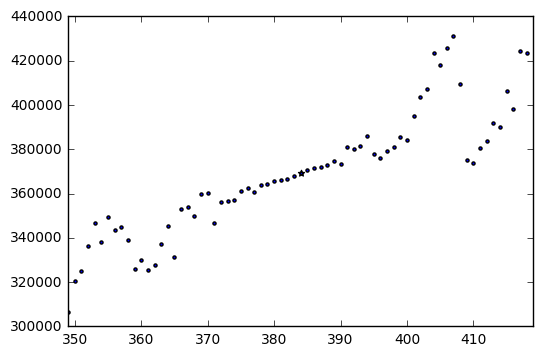

Recursively Biheapifying 832 elements.
Input data:


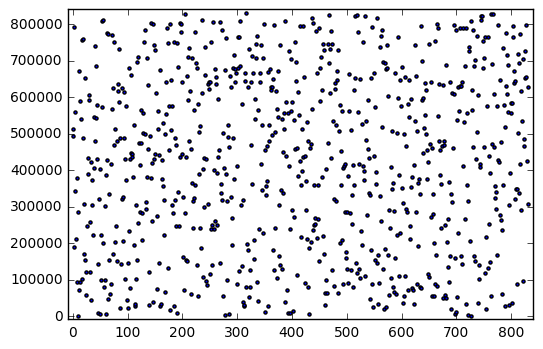

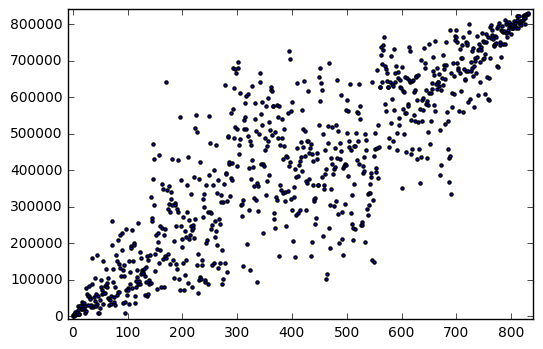

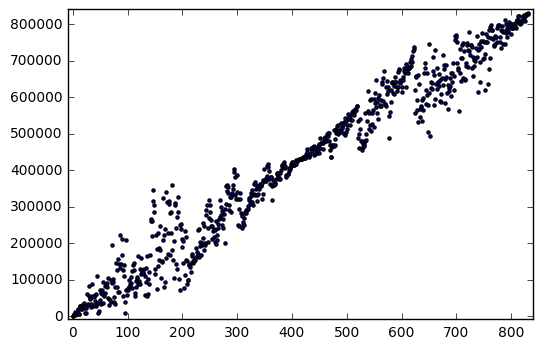

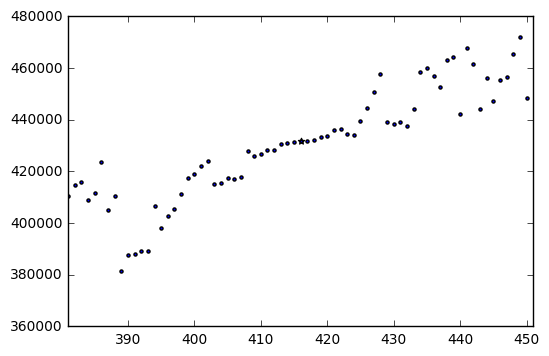

Recursively Biheapifying 896 elements.
Input data:


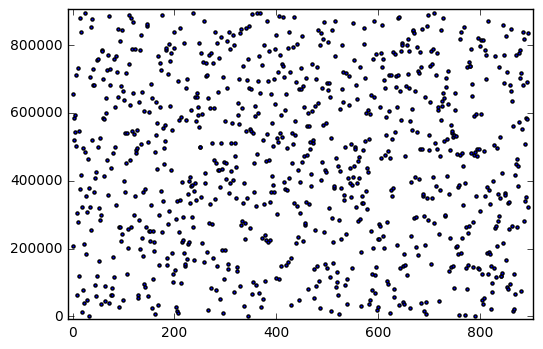

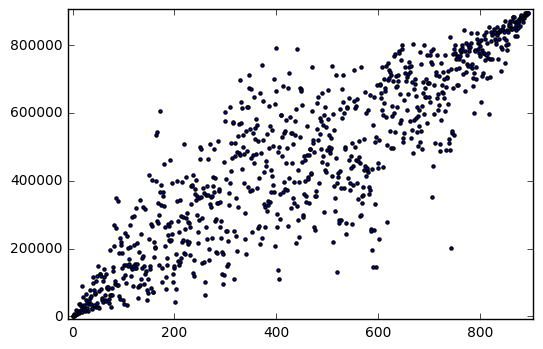

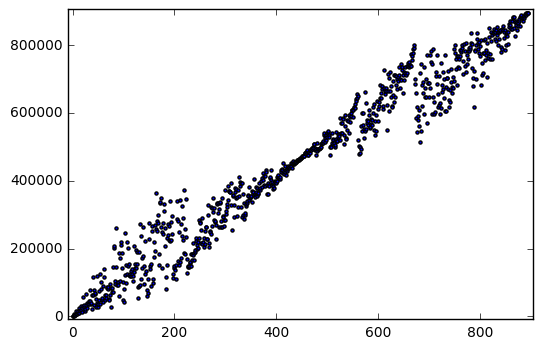

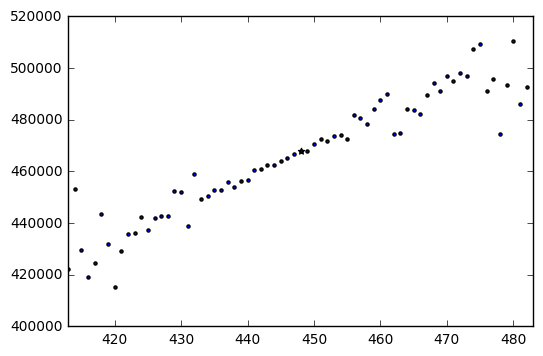

Recursively Biheapifying 960 elements.
Input data:


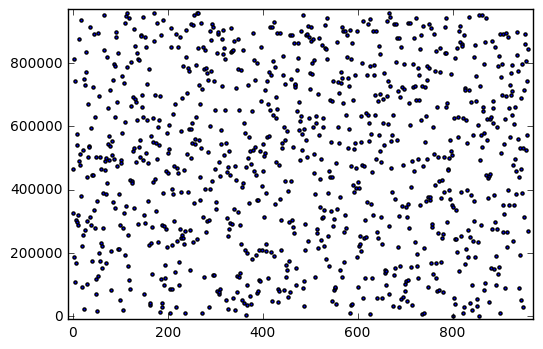

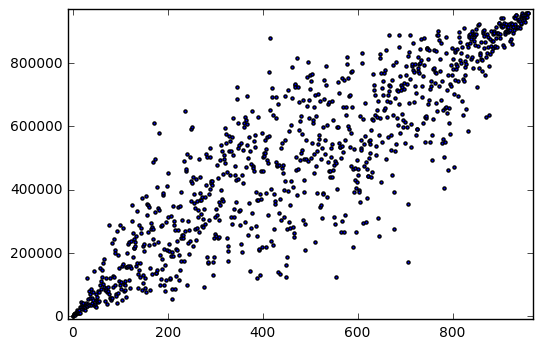

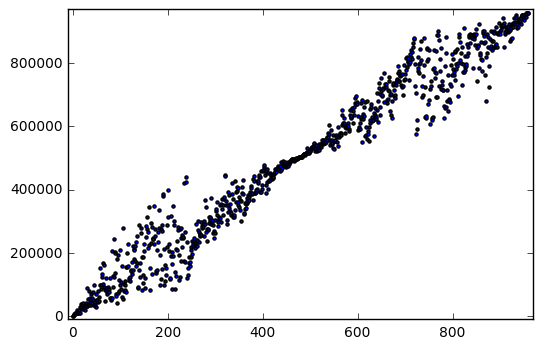

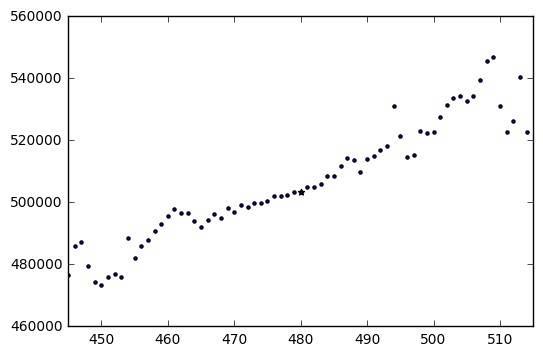

Recursively Biheapifying 1024 elements.
Input data:


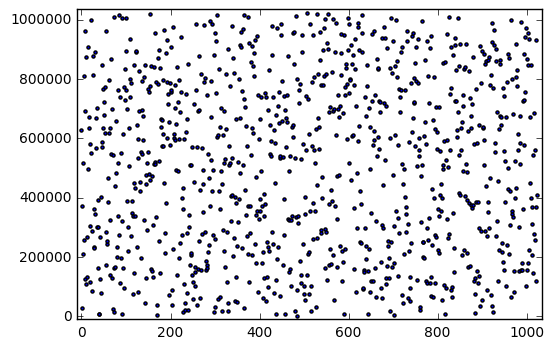

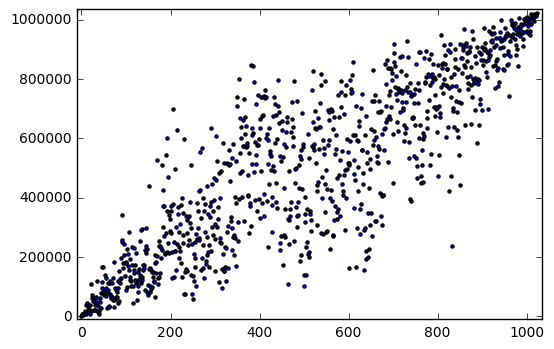

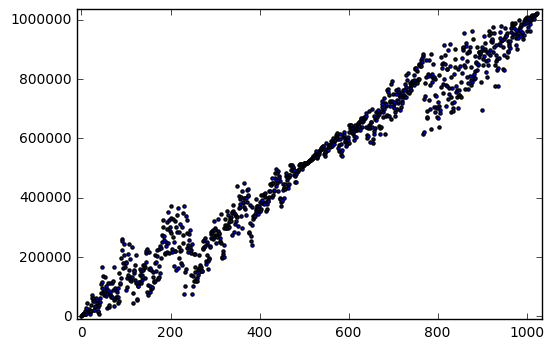

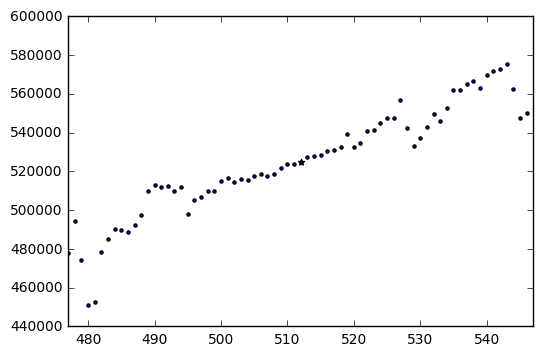

Recursively Biheapifying 1088 elements.
Input data:


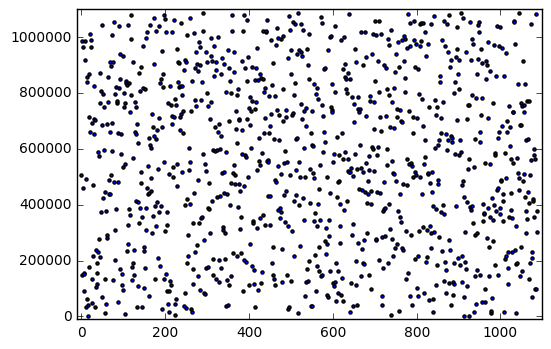

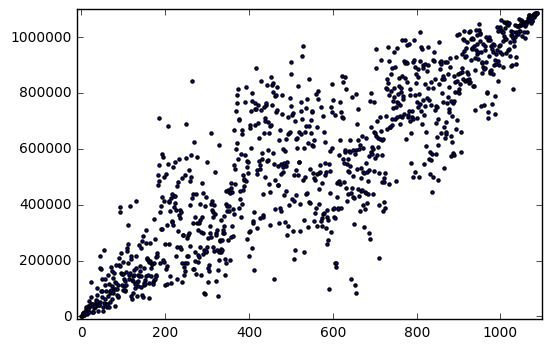

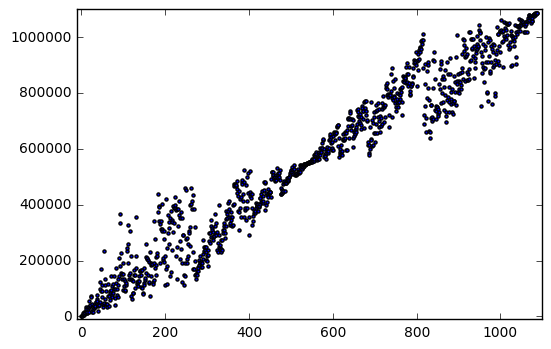

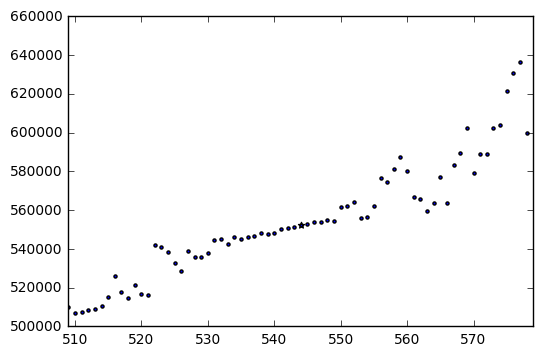

Recursively Biheapifying 1152 elements.
Input data:


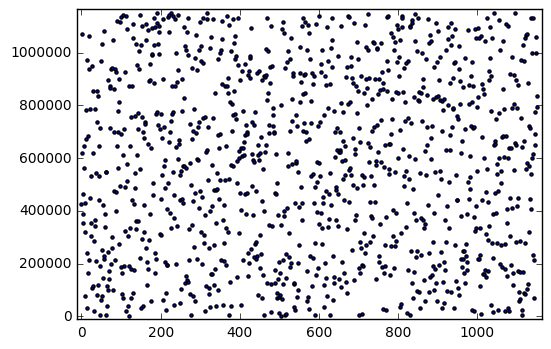

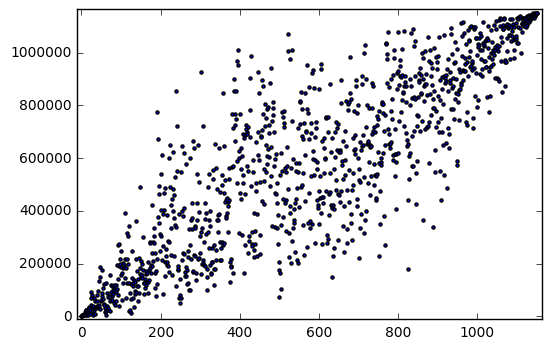

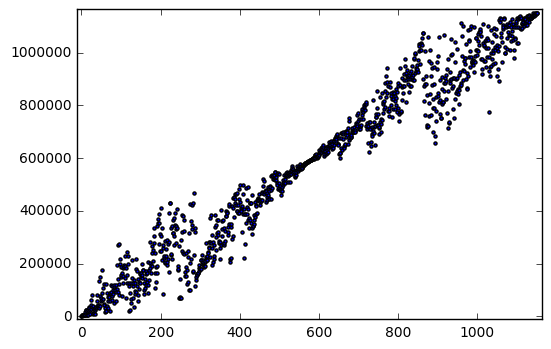

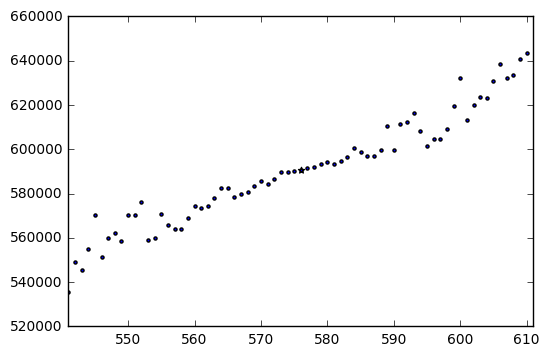

Recursively Biheapifying 1216 elements.
Input data:


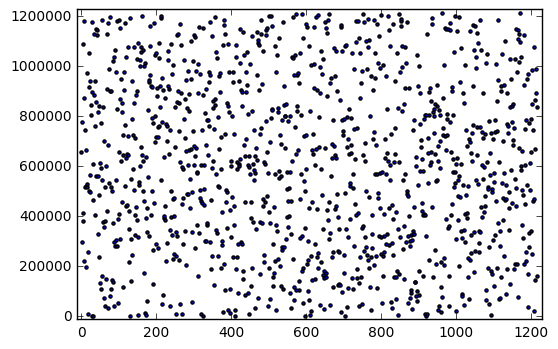

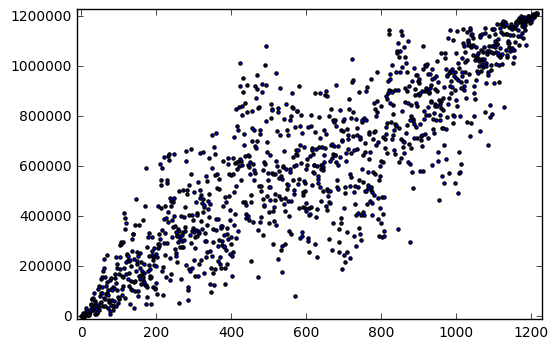

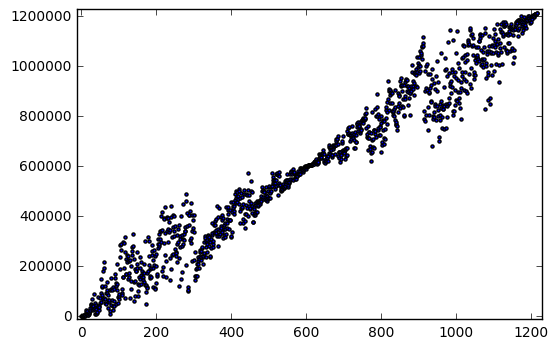

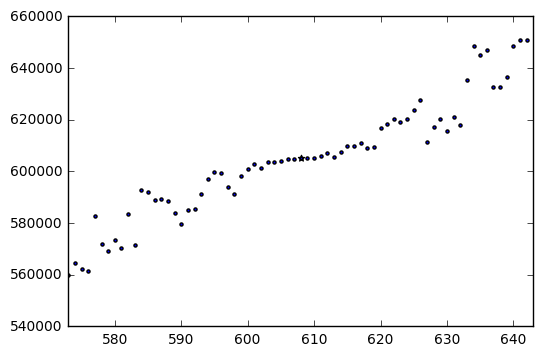

Recursively Biheapifying 1280 elements.
Input data:


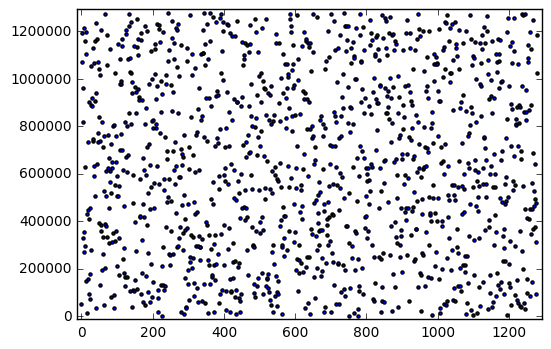

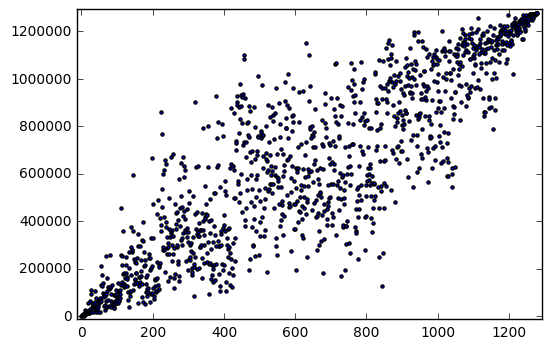

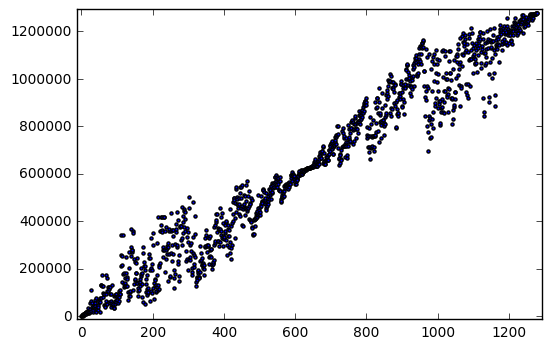

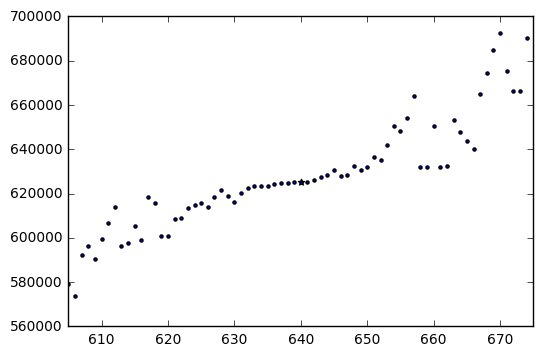

Recursively Biheapifying 1344 elements.
Input data:


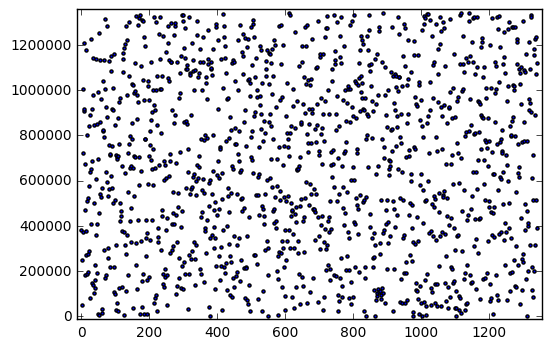

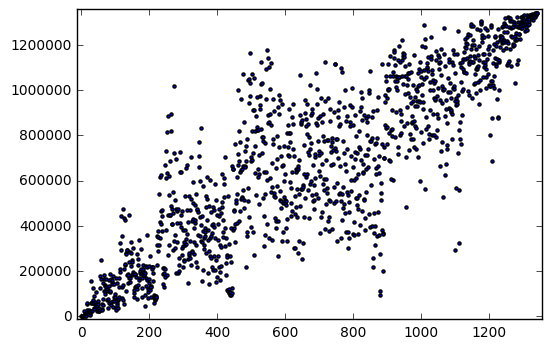

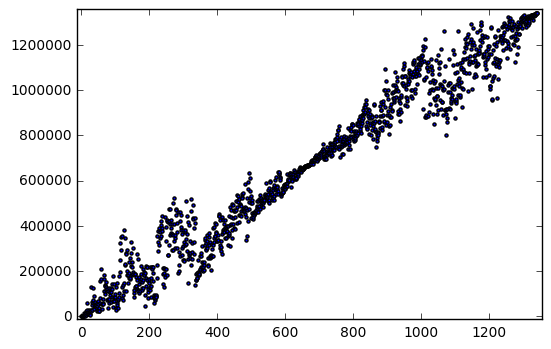

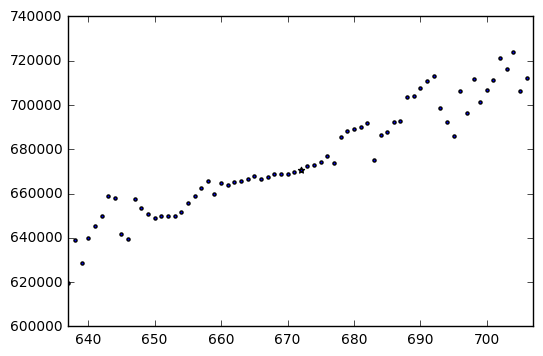

Recursively Biheapifying 1408 elements.
Input data:


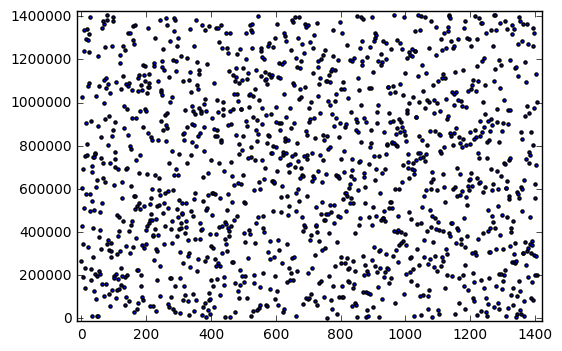

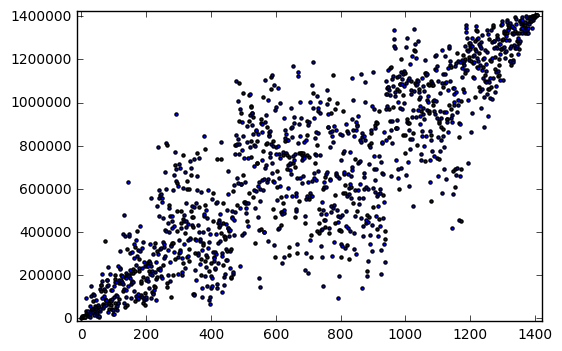

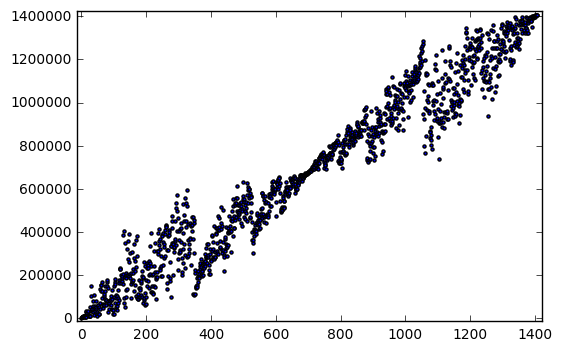

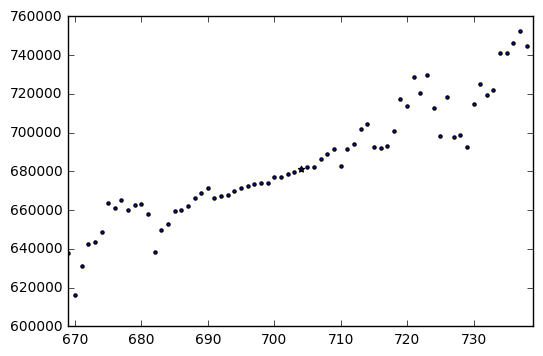

Recursively Biheapifying 1472 elements.
Input data:


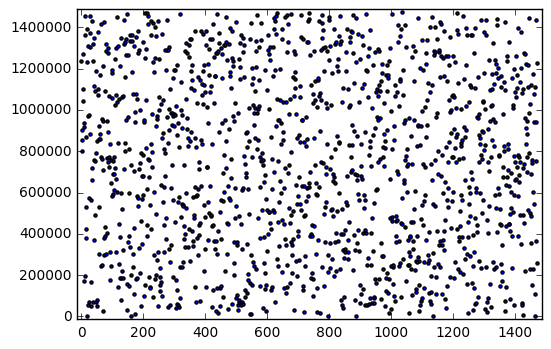

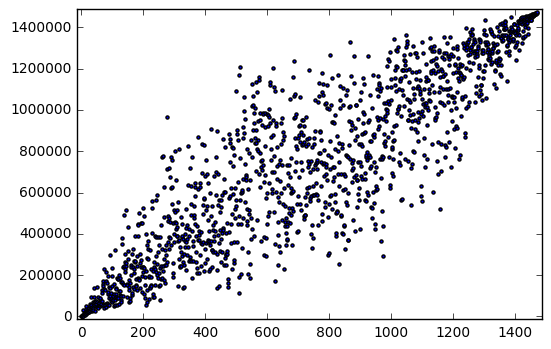

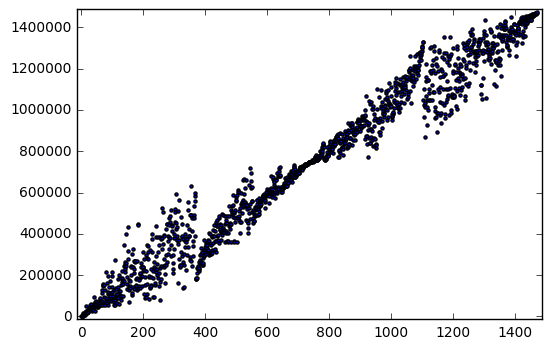

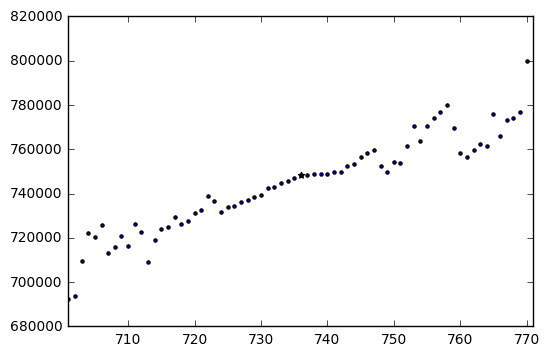

Recursively Biheapifying 1536 elements.
Input data:


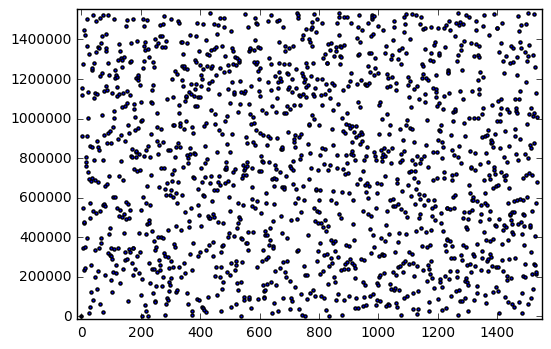

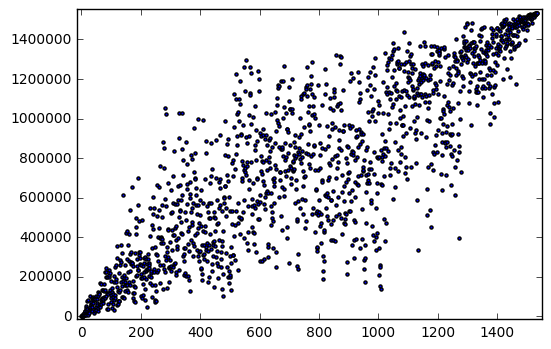

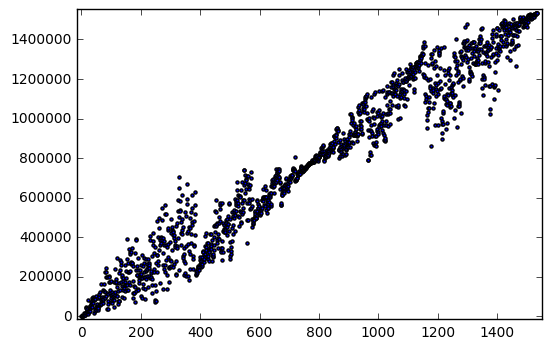

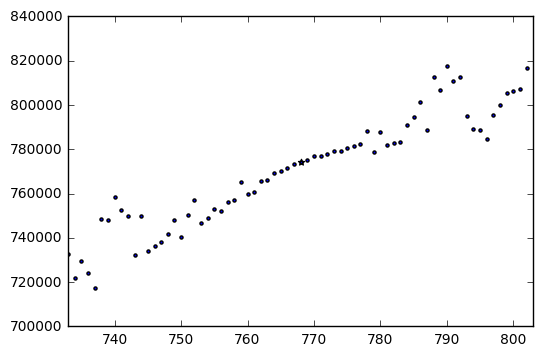

Recursively Biheapifying 1600 elements.
Input data:


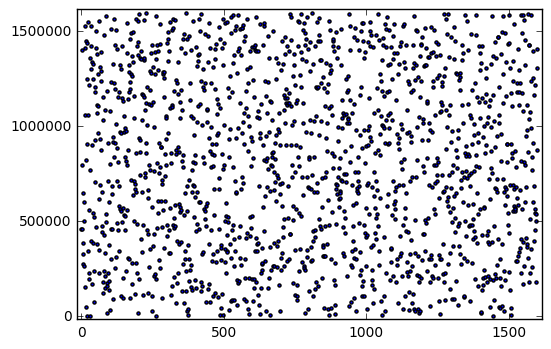

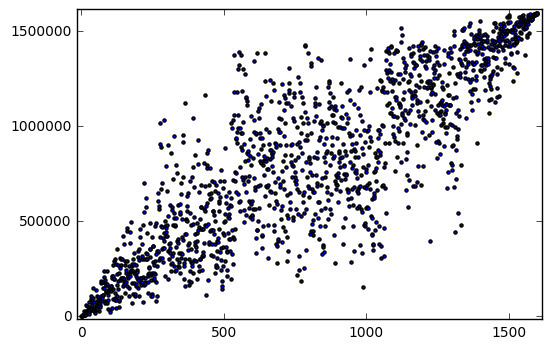

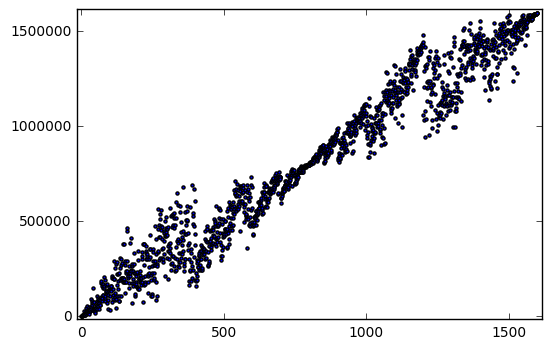

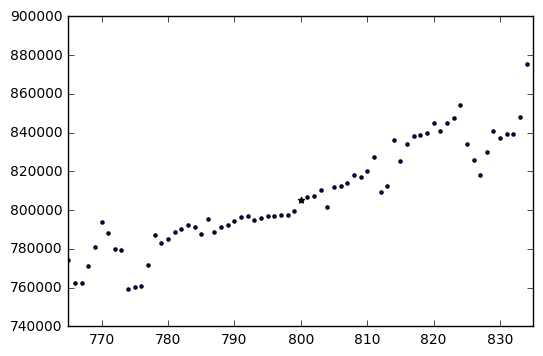

Recursively Biheapifying 1664 elements.
Input data:


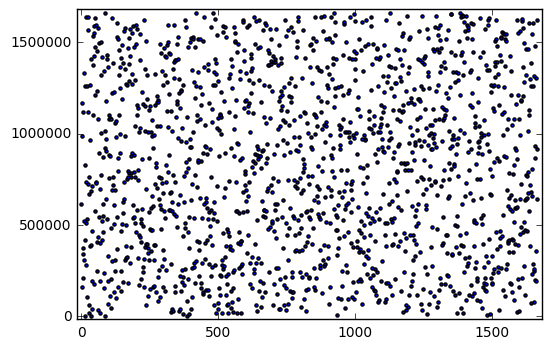

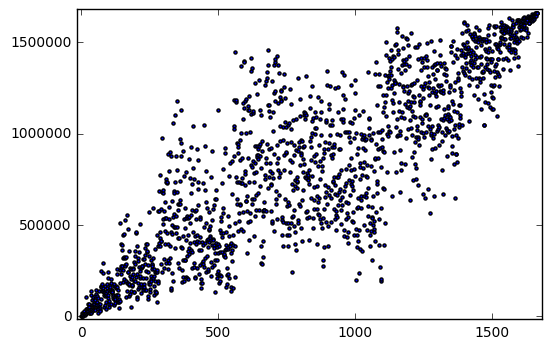

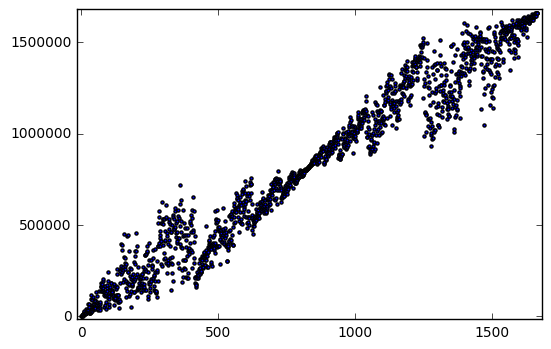

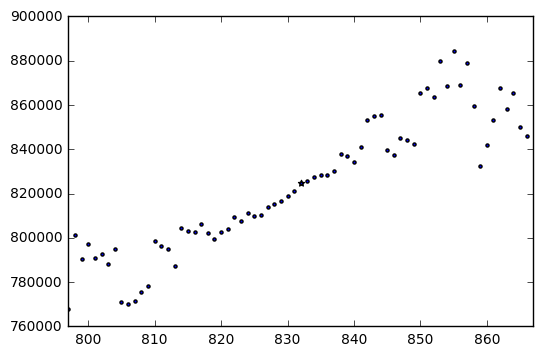

Recursively Biheapifying 1728 elements.
Input data:


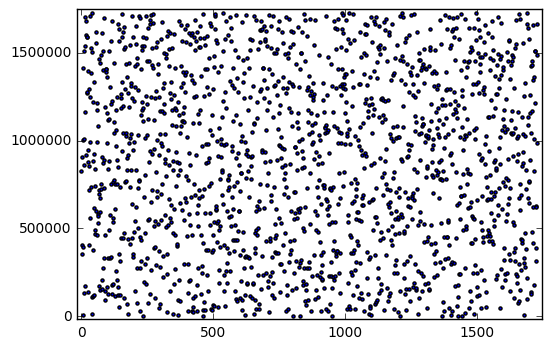

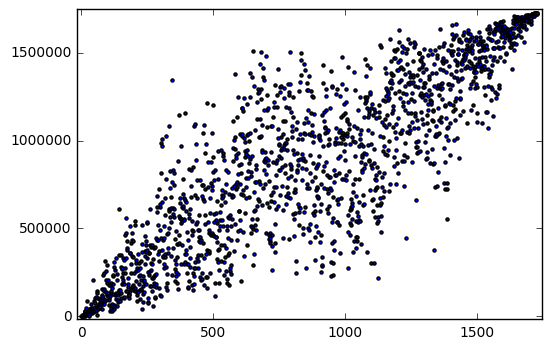

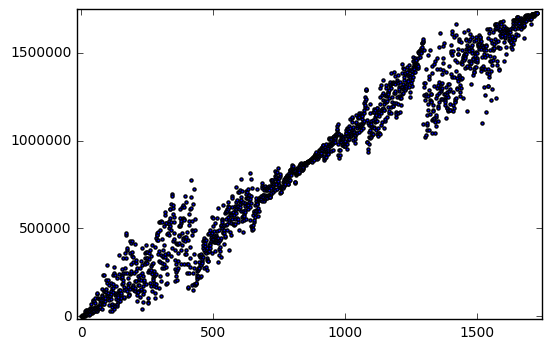

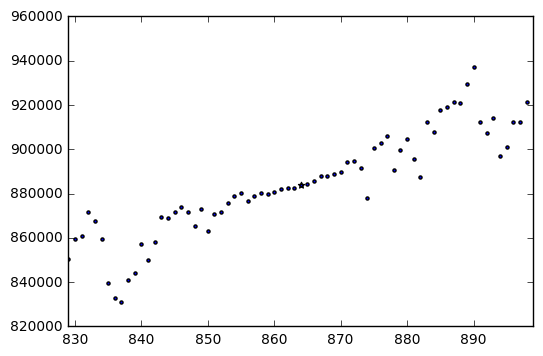

Recursively Biheapifying 1792 elements.
Input data:


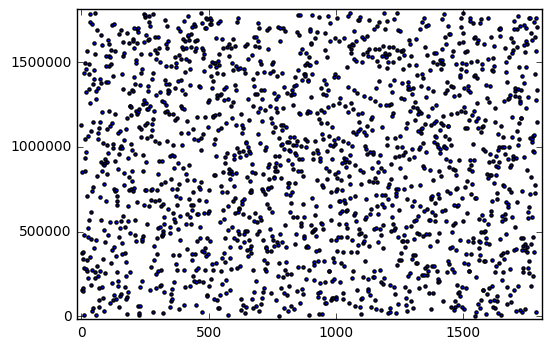

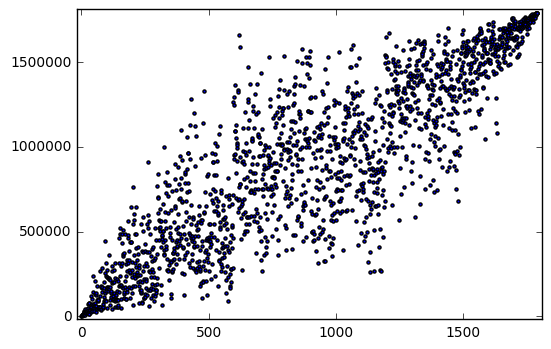

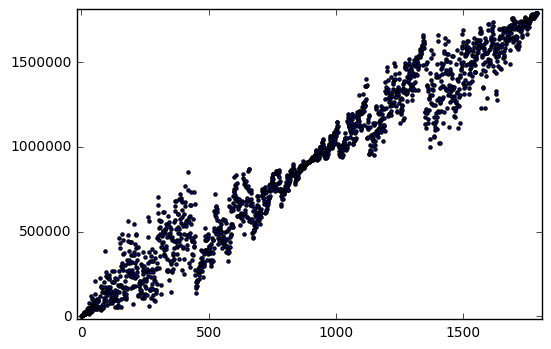

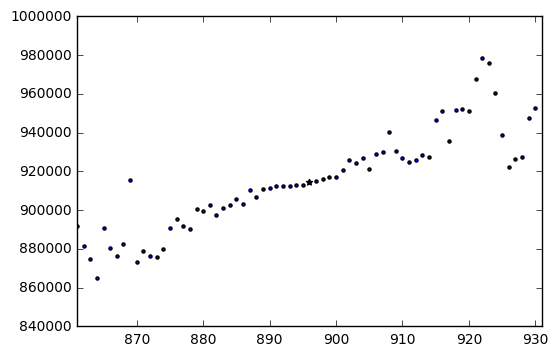

Recursively Biheapifying 1856 elements.
Input data:


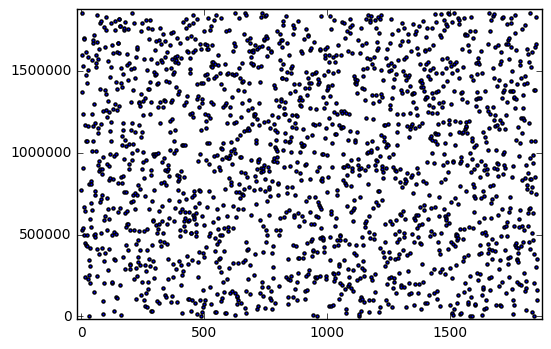

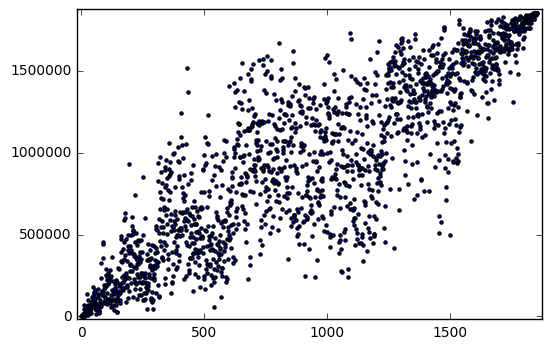

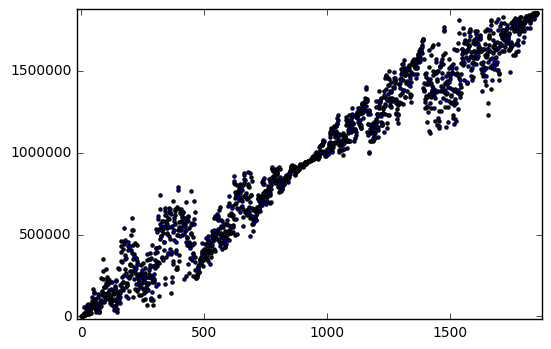

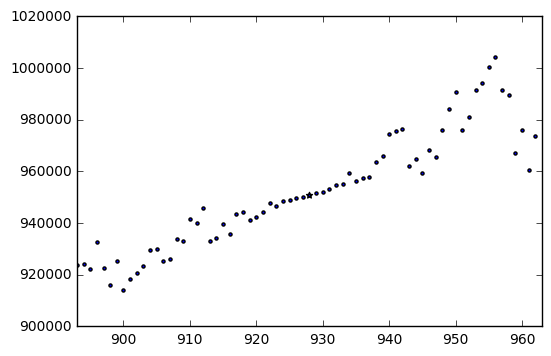

Recursively Biheapifying 1920 elements.
Input data:


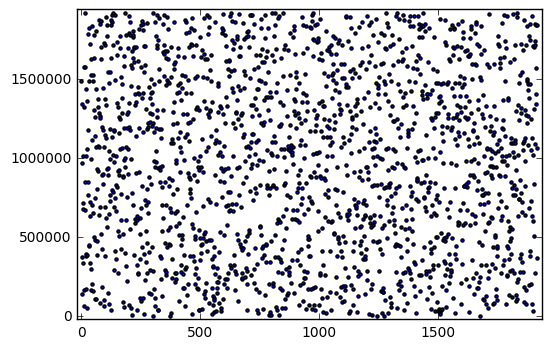

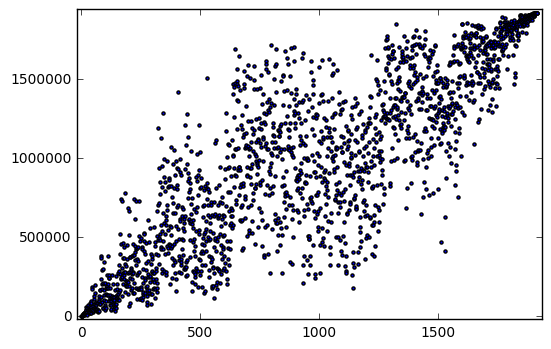

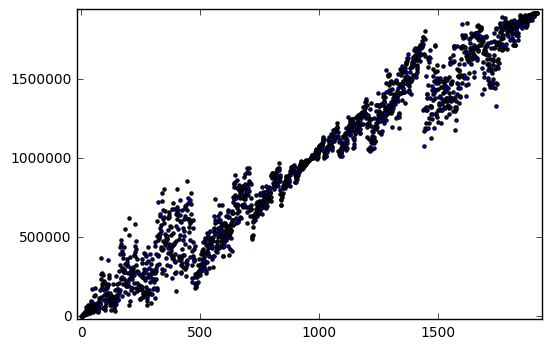

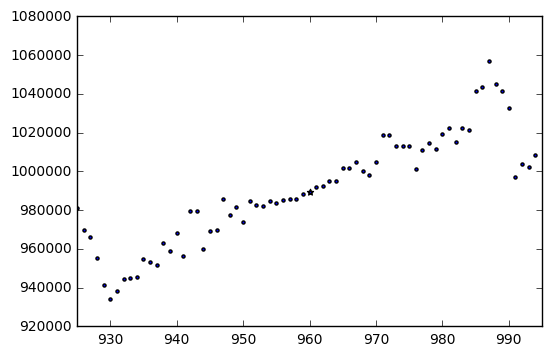

Recursively Biheapifying 1984 elements.
Input data:


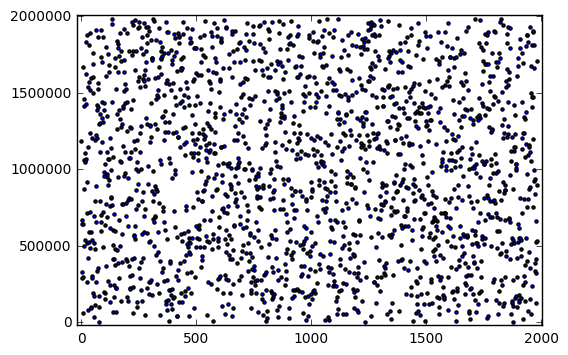

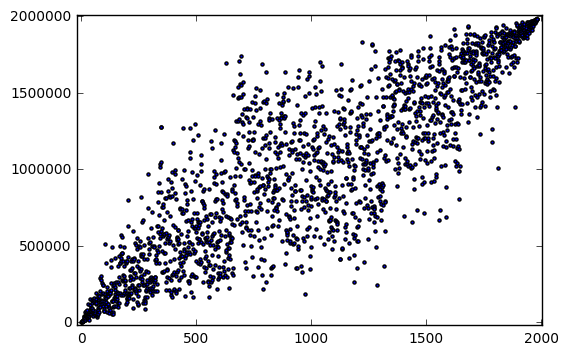

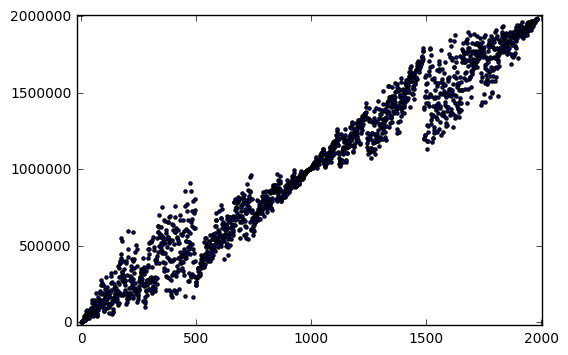

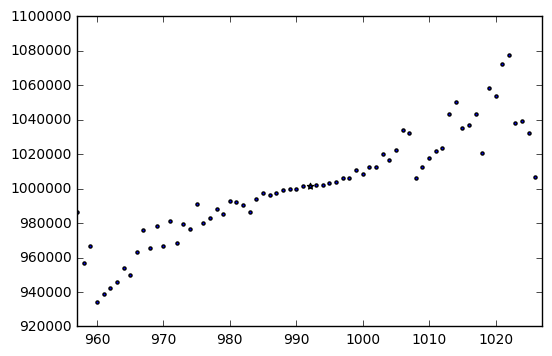

Recursively Biheapifying 2048 elements.
Input data:


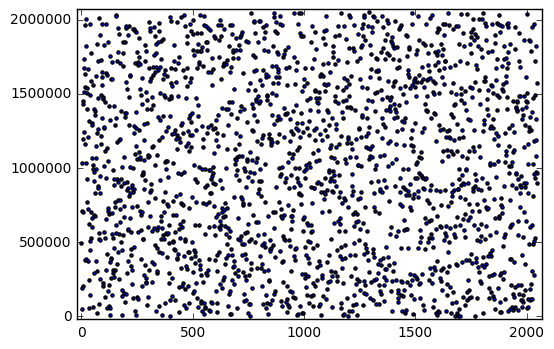

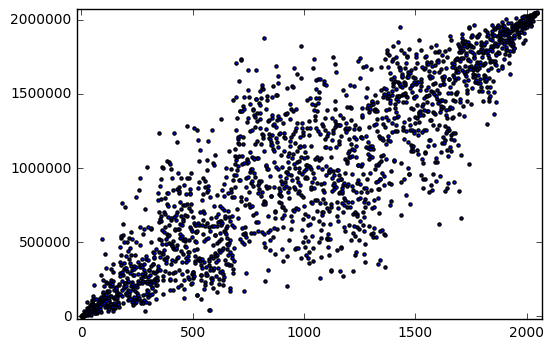

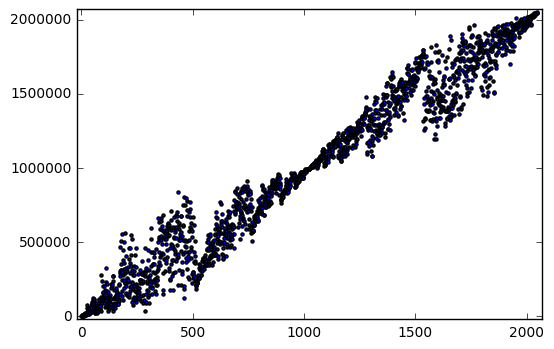

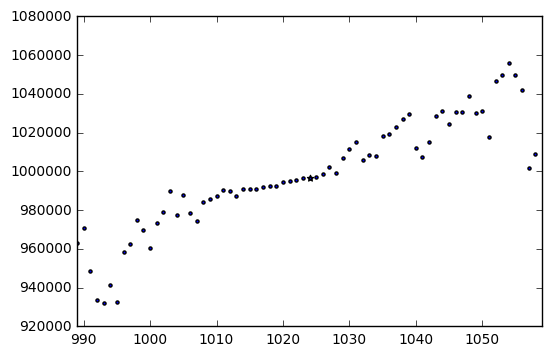

In [46]:
import random
import matplotlib.pyplot as plt
#This recursive function has complexity O(n) = O(n + n/2 + n/4 + n/8 + --- n/2**(log_2(n))),
# = O(n + n/2 + n/4 + n/8 + --- + 2 + 1) where n is a power of 2 
# approximately equal to total_num_nodes.
#From BiHeapifyRecPlot2()'s output, note that after calling BiHeapifyRec2() on a list 
# of random number consistently results in the element li[start_index + total_num_nodes // 2] 
# being approximately equal to the median of the list.
#BiHeapifyRec2() is thus an O(n) function that emperically frequently gives a 
# good approximation of the median.
def BiHeapifyRec2(li, start_index, total_num_nodes):
    if total_num_nodes <= 1:
        return
    BiHeapifySub(li, start_index, total_num_nodes)
    three_forth_size = total_num_nodes - total_num_nodes // 4
    BiHeapifySub(li, start_index + 1, three_forth_size - 1)
    start = start_index + total_num_nodes // 4
    BiHeapifySub(li, start, three_forth_size - 1)
    
    BiHeapifySub(li, start, total_num_nodes // 2)
    BiHeapifySub(li, start_index + 1, total_num_nodes // 2)
    BiHeapifySub(li, start_index + total_num_nodes // 2, total_num_nodes // 2)
    BiHeapifySub(li, start_index + 1, total_num_nodes - 2)
    
    new_total_num_nodes = total_num_nodes // 2
    new_start_index = start_index + (new_total_num_nodes // 2)
    BiHeapifyRec2(li, new_start_index, new_total_num_nodes)
    BiHeapifySub(li, start_index, total_num_nodes)
    return

def BiHeapifyRecPlot2():
    list_size_start = 2**7
    list_size_end = 2**11
    list_size_increment = 2**6
    list_size = list_size_start
    num_random_lists_per_vec_size = 1
    while list_size <= list_size_end:
        print('Recursively Biheapifying', list_size, 'elements.')
        ints_list = [x for x in range(list_size)]
        for _ in range(num_random_lists_per_vec_size):
            print("Input data:")
            max = list_size * 1000
            li = [max * random.random() for _ in range(list_size)]
            plt.scatter(ints_list, li, marker = '.')
            plt.axis([-0.01 * list_size, list_size * (1.01), -0.01 * max, 1.01 * max])
            plt.show() #show() the original data.
            BiHeapify(li, list_size)
            plt.scatter(ints_list, li, marker = '.')
            plt.axis([-0.01 * list_size, list_size * (1.01), -0.01 * max, 1.01 * max])
            plt.show() #show() the data after one call to BiHeapify().
            BiHeapifyRec2(li, 0, list_size)
            plt.scatter(ints_list, li, marker = '.')
            plt.axis([-0.01 * list_size, list_size * (1.01), -0.01 * max, 1.01 * max])
            plt.show() #show() the data after one call to BiHeapifyRec2().
            xmini = (list_size // 2) - 35
            xmaxi = (list_size // 2) + 35
            if xmini < 0:
                xmini = 0
            if xmaxi > list_size:
                xmaxi = list_size
            plt.scatter(ints_list[xmini:xmaxi], li[xmini:xmaxi], marker = '.')
            plt.scatter(ints_list[list_size // 2], li[list_size // 2], marker = '*')
            plt.axis(xmin=xmini, xmax=xmaxi)
            plt.show() #show() the data in the middle of the list.
        if list_size >= list_size_end:
            break
        list_size += list_size_increment
        
BiHeapifyRecPlot2()